In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
train = pd.read_csv('ps1_dataA_15TC.csv', header=None)
time_indices = list(train.iloc[4:, 0])
train = train.iloc[4:, 1:]
train.reset_index(drop=True, inplace=True)

In [3]:
train_data = {'time': [],
        'r':[],
        'z':[],
        'temperature': []
        }

for i in range(5):
    for j in range(3):
        for k in range(len(time_indices)):
            train_data['r'].append(j*0.25)
            train_data['z'].append(i*0.25)
            train_data['temperature'].append(train.iloc[k,(i*3+j)%15])
            train_data['time'].append(time_indices[k])

train_df = pd.DataFrame(train_data)

In [4]:
def get_index_train(r,z,t):
    index = 251*(r//0.25) + 251*3*(z//0.25) + t*10
    return int(index)

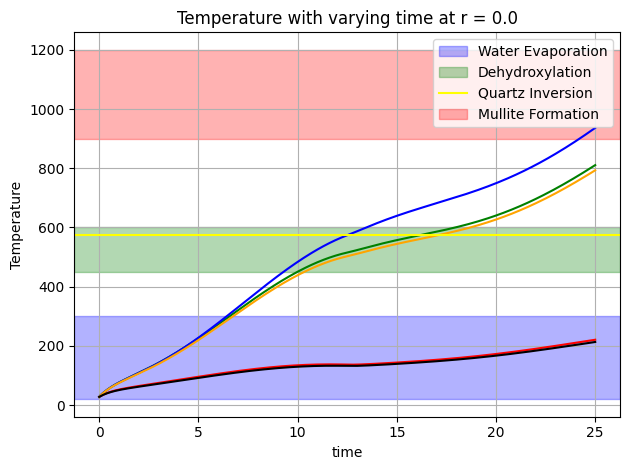

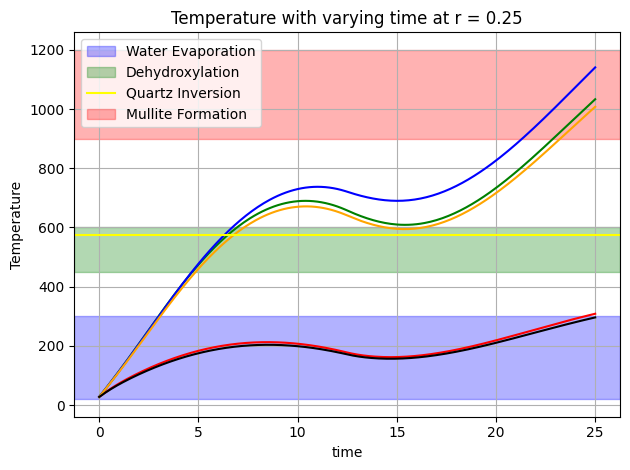

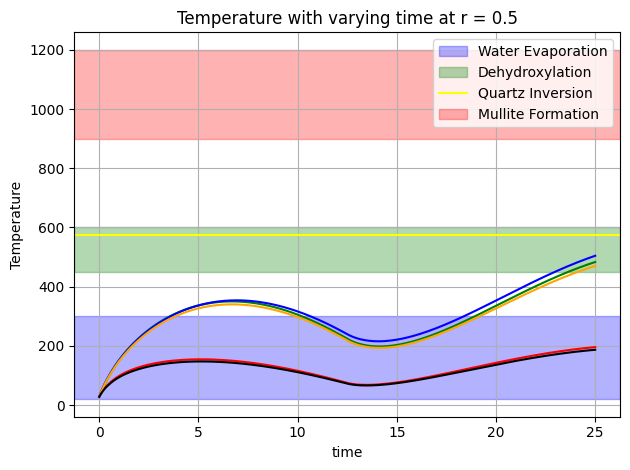

In [5]:
colors = ["red","green","blue","orange","black"]
for i in range(3):
    for j in range(5):
        ind = get_index_train(i*0.25,j*0.25,0)
        plt.plot(train_df.iloc[ind:ind+251,0],train_df.iloc[ind:ind+251,3], color = colors[j])
    plt.title(f"Temperature with varying time at r = {i*0.25}")
    plt.xlabel('time')
    plt.ylabel("Temperature")
    plt.grid(True)
    plt.axhspan(20, 300, color='blue', alpha=0.3, label='Water Evaporation')
    plt.axhspan(450, 600, color='green', alpha=0.3, label='Dehydroxylation')
    plt.axhline(573,color='yellow',label='Quartz Inversion')
    plt.axhspan(900, 1200, color='red', alpha=0.3, label='Mullite Formation')
    plt.tight_layout()
    plt.legend()
    plt.show()

In [6]:
a_train = pd.DataFrame(train_data)
a_train

time    r    z  temperature
0      0.0  0.0  0.0    27.998536
1      0.1  0.0  0.0    31.794445
2      0.2  0.0  0.0    35.462488
3      0.3  0.0  0.0    38.513040
4      0.4  0.0  0.0    41.189601
...    ...  ...  ...          ...
3760  24.6  0.5  1.0   184.628387
3761  24.7  0.5  1.0   185.280613
3762  24.8  0.5  1.0   185.912706
3763  24.9  0.5  1.0   186.524496
3764  25.0  0.5  1.0   187.115819

[3765 rows x 4 columns]

In [7]:
a_train = train_df

In [8]:
a_test = pd.read_csv('ps1_dataA_120TC.csv', header = None)
a_test

0           1           2           3           4           5    \
0     NaN    0.000000    0.071429    0.142857    0.214286    0.285714   
1     NaN    0.000000    0.000000    0.000000    0.000000    0.000000   
2     NaN         NaN         NaN         NaN         NaN         NaN   
3     NaN         NaN         NaN         NaN         NaN         NaN   
4     0.0   27.998536   27.996281   27.995153   27.997409   27.999664   
..    ...         ...         ...         ...         ...         ...   
250  24.6  216.746515  209.925219  222.700342  273.569801  328.520109   
251  24.7  217.791941  211.014533  223.952117  275.083607  330.262328   
252  24.8  218.837294  212.104885  225.202731  276.587104  331.982691   
253  24.9  219.882297  213.195976  226.451819  278.079837  333.680688   
254  25.0  220.926672  214.287506  227.699015  279.561360  335.355809   

            6           7           8           9    ...         111  \
0      0.357143    0.428571    0.500000    0.000000  ...    0.428571   
1      0.000000    0.000000    0.000000    0.071429  ...    0.928571   
2           NaN         NaN         NaN         NaN  ...         NaN   
3           NaN         NaN         NaN         NaN  ...         NaN   
4     28.001918   28.004180   28.000956   28.003974  ...   28.009131   
..          ...         ...         ...         ...  ...         ...   
250  361.080250  337.660476  193.453839  454.177724  ...  631.805576   
251  362.853838  339.110544  194.137189  456.561768  ...  634.865344   
252  364.595310  340.524964  194.799200  458.950430  ...  637.861768   
253  366.304161  341.903346  195.439696  461.343088  ...  640.794000   
254  367.979898  343.245307  196.058504  463.739113  ...  643.661214   

            112         113         114         115         116         117  \
0      0.500000    0.000000    0.071429    0.142857    0.214286    0.285714   
1      0.928571    1.000000    1.000000    1.000000    1.000000    1.000000   
2           NaN         NaN         NaN         NaN         NaN         NaN   
3           NaN         NaN         NaN         NaN         NaN         NaN   
4     28.005791   27.998290   27.996176   27.995118   27.997234   27.999349   
..          ...         ...         ...         ...         ...         ...   
250  339.929103  209.347193  202.955878  215.084847  263.107026  314.839429   
251  341.351485  210.352902  204.003639  216.287615  264.559094  316.508035   
252  342.737222  211.358741  205.052573  217.489464  266.001576  318.156109   
253  344.085936  212.364448  206.102395  218.690045  267.434041  319.783159   
254  345.397253  213.369761  207.152820  219.889009  268.856059  321.388702   

            118         119         120  
0      0.357143    0.428571    0.500000  
1      1.000000    1.000000    1.000000  
2           NaN         NaN         NaN  
3           NaN         NaN         NaN  
4     28.001462   28.003584   28.000221  
..          ...         ...         ...  
250  345.120012  322.082897  184.628387  
251  346.816433  323.468172  185.280613  
252  348.482579  324.819806  185.912706  
253  350.117969  326.137426  186.524496  
254  351.722130  327.420665  187.115819  

[255 rows x 121 columns]

In [9]:
a_test = a_test.iloc[4:, 1:]
a_test.reset_index(drop = True, inplace = True)
a_test.index = time_indices
a_test

1           2           3           4           5           6    \
0.0    27.998536   27.996281   27.995153   27.997409   27.999664   28.001918   
0.1    31.794445   28.770636   27.053695   30.821268   34.677540   38.534137   
0.2    35.462488   30.452550   27.698333   34.425716   41.551243   48.683532   
0.3    38.513040   32.047812   28.664257   37.890309   47.958180   58.046774   
0.4    41.189601   33.574525   29.789141   41.252479   54.064592   66.916173   
...          ...         ...         ...         ...         ...         ...   
24.6  216.746515  209.925219  222.700342  273.569801  328.520109  361.080250   
24.7  217.791941  211.014533  223.952117  275.083607  330.262328  362.853838   
24.8  218.837294  212.104885  225.202731  276.587104  331.982691  364.595310   
24.9  219.882297  213.195976  226.451819  278.079837  333.680688  366.304161   
25.0  220.926672  214.287506  227.699015  279.561360  335.355809  367.979898   

             7           8           9           10   ...         111  \
0.0    28.004180   28.000956   28.003974   28.001710  ...   28.009131   
0.1    42.383308   40.422807   35.186855   31.478495  ...   47.291216   
0.2    55.740022   50.763249   41.308591   34.741889  ...   66.431373   
0.3    67.813150   59.224764   46.659720   37.817867  ...   85.067798   
0.4    79.022507   66.632213   51.504285   40.777549  ...  103.146689   
...          ...         ...         ...         ...  ...         ...   
24.6  337.660476  193.453839  454.177724  446.739617  ...  631.805576   
24.7  339.110544  194.137189  456.561768  449.231101  ...  634.865344   
24.8  340.524964  194.799200  458.950430  451.728460  ...  637.861768   
24.9  341.903346  195.439696  461.343088  454.231015  ...  640.794000   
25.0  343.245307  196.058504  463.739113  456.738084  ...  643.661214   

             112         113         114         115         116         117  \
0.0    28.005791   27.998290   27.996176   27.995118   27.997234   27.999349   
0.1    44.536927   31.439989   28.599958   26.987361   30.526209   34.148452   
0.2    59.192379   34.855277   30.147140   27.558978   33.881921   40.579435   
0.3    72.132221   37.704734   31.626547   28.446029   37.121615   46.589657   
0.4    83.983539   40.209004   33.047664   29.488781   40.272332   52.326140   
...          ...         ...         ...         ...         ...         ...   
24.6  339.929103  209.347193  202.955878  215.084847  263.107026  314.839429   
24.7  341.351485  210.352902  204.003639  216.287615  264.559094  316.508035   
24.8  342.737222  211.358741  205.052573  217.489464  266.001576  318.156109   
24.9  344.085936  212.364448  206.102395  218.690045  267.434041  319.783159   
25.0  345.397253  213.369761  207.152820  219.889009  268.856059  321.388702   

             118         119         120  
0.0    28.001462   28.003584   28.000221  
0.1    37.771003   41.386455   39.451091  
0.2    47.283312   53.914642   49.127943  
0.3    56.077182   65.257639   57.065161  
0.4    64.417015   75.799131   64.022769  
...          ...         ...         ...  
24.6  345.120012  322.082897  184.628387  
24.7  346.816433  323.468172  185.280613  
24.8  348.482579  324.819806  185.912706  
24.9  350.117969  326.137426  186.524496  
25.0  351.722130  327.420665  187.115819  

[251 rows x 120 columns]

In [10]:
test_data = {'time': [],
             'r': [],
             'z': [],
             'temperature': []
             }

for i in range(15):
    for j in range(8):
        for k in range(len(time_indices)):
            test_data['r'].append(i/14)
            test_data['z'].append(j/14)
            test_data['temperature'].append(a_test.iloc[k, (i*8+j)%120])
            test_data['time'].append(time_indices[k])

In [11]:
a_test = pd.DataFrame(test_data)
a_test

time    r    z  temperature
0       0.0  0.0  0.0    27.998536
1       0.1  0.0  0.0    31.794445
2       0.2  0.0  0.0    35.462488
3       0.3  0.0  0.0    38.513040
4       0.4  0.0  0.0    41.189601
...     ...  ...  ...          ...
30115  24.6  1.0  0.5   184.628387
30116  24.7  1.0  0.5   185.280613
30117  24.8  1.0  0.5   185.912706
30118  24.9  1.0  0.5   186.524496
30119  25.0  1.0  0.5   187.115819

[30120 rows x 4 columns]

In [12]:
# Device configuration - VERIFY GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Verify GPU details if available
if device.type == 'cuda':
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")

Using device: cpu


In [13]:
# Model Class (FIXED ACTIVATION FUNCTIONS)
class ImprovedPINN(nn.Module):
    def __init__(self, layers=(3, 1024, 512, 128, 64, 32, 1)):
        super().__init__()

        # Input normalization layer
        self.input_norm = nn.BatchNorm1d(3)

        # Main network with residual connections
        self.layers = nn.ModuleList()
        self.residual_connections = []

        for i in range(len(layers) - 1):
            layer = nn.Linear(layers[i], layers[i + 1])
            nn.init.xavier_normal_(layer.weight)
            nn.init.zeros_(layer.bias)
            self.layers.append(layer)

            # Mark residual connections (skip connections)
            if i > 0 and i < len(layers) - 2 and layers[i] == layers[i + 1]:
                self.residual_connections.append(i)

        # Activation functions - FIXED: nn.ReLU() instead of nn.relu()
        self.activations = [
            nn.GELU(),
            nn.GELU(),
            nn.GELU(),
            nn.GELU(),
            nn.GELU(),
            None
        ]

        # Output scaling to help with gradient flow
        self.output_scale = nn.Parameter(torch.ones(1))

    def forward(self, x):
        # Input normalization
        if x.shape[0] > 1:  # Only apply if batch size > 1
            x = self.input_norm(x)

        # Forward through network with residual connections
        h = x
        for i, layer in enumerate(self.layers[:-1]):
            h_new = layer(h)

            # Apply activation
            if self.activations[i] is not None:
                h_new = self.activations[i](h_new)

            # Add residual connection if applicable
            if i in self.residual_connections and h.shape == h_new.shape:
                h = h + h_new
            else:
                h = h_new

        # Output layer
        output = self.layers[-1](h)
        return output * self.output_scale


In [14]:
def prepare_training_tensors(data):
    """
    Prepare training tensors from your data
    Assumes data is a DataFrame or array with columns [r, z, time, temperature]
    """
    if hasattr(data, 'values'):  # DataFrame
        X = torch.tensor(data[['r', 'z', 'time']].values, dtype=torch.float32, device=device)
        y = torch.tensor(data['temperature'].values, dtype=torch.float32, device=device)
    else:  # NumPy array
        X = torch.tensor(data[:, :3], dtype=torch.float32, device=device)  # r, z, t
        y = torch.tensor(data[:, 3], dtype=torch.float32, device=device)   # temperature

    return X, y

In [15]:
# Training Functions
def supervised_loss(model, X_data, y_data):
    """Phase 1: Supervised MSE loss (data only)"""
    pred = model(X_data).squeeze(-1)
    return nn.MSELoss()(pred, y_data)

In [16]:
def train(model, X_data, y_data, epochs,patience,learning_rate, device='cpu'):

    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=patience//10, min_lr=1e-6)

    print(f"Training on {len(X_data)} data points")

    best_rmse = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        loss = supervised_loss(model, X_data, y_data)
        loss.backward()
        optimizer.step()

        # Evaluate
        with torch.no_grad():
            pred = model(X_data).squeeze(-1)
            mse = nn.MSELoss()(pred, y_data).item()
            rmse = mse ** 0.5

        if rmse < best_rmse - 1e-6:
            best_rmse = rmse
            patience_counter = 0
            best_state = model.state_dict()
        else:
            patience_counter += 1

        if epoch % 1000 == 0:
            print(f"Epoch {epoch:4d} | Supervised Loss: {loss.item():.4e} | RMSE: {rmse:.4f}")

        if patience_counter > patience//4:
            print("Early stopping (Phase 1)")
            break

    model.load_state_dict(best_state)
    print("Training complete.")
    return model


In [17]:
# MAIN EXECUTION
if __name__ == "__main__":

    X_data, y_data = prepare_training_tensors(a_train)

    print(f"Data loaded: {len(X_data)} points")
    print(f"Temperature range: {y_data.min().item():.1f} to {y_data.max().item():.1f} °C")

    # Initialize model
    model = ImprovedPINN().to(device)
    print(f"Model initialized with {sum(p.numel() for p in model.parameters())} parameters")

    # Train model
    trained_model = train(model, X_data, y_data, 5000,1000 ,5e-4, device=device)

    print("Training completed successfully!")

    # Final evaluation
    with torch.no_grad():
        pred = trained_model(X_data).squeeze(-1)
        final_rmse = torch.sqrt(nn.MSELoss()(pred, y_data)).item()
        print(f"Final RMSE: {final_rmse:.4f} °C")

Data loaded: 3765 points
Temperature range: 28.0 to 1140.6 °C
Model initialized with 604936 parameters
Training on 3765 data points
Epoch    0 | Supervised Loss: 1.7238e+05 | RMSE: 415.1726
Epoch 1000 | Supervised Loss: 2.7452e+01 | RMSE: 5.8867
Epoch 2000 | Supervised Loss: 1.1509e+01 | RMSE: 1.8148
Epoch 3000 | Supervised Loss: 1.6758e+00 | RMSE: 1.4086
Epoch 4000 | Supervised Loss: 1.3879e+00 | RMSE: 1.1072
Training complete.
Training completed successfully!
Final RMSE: 0.9229 °C


In [18]:
df_test = pd.read_csv('ps1_dataA_120TC.csv', header=None)
df_test = df_test.iloc[4:, 1:]
df_test.reset_index(drop=True, inplace=True)
df_test.index = time_indices

In [19]:
test_data = {'time': [],
             'r': [],
             'z': [],
             'temperature': []
             }

for i in range(15):
    for j in range(8):
        for k in range(len(time_indices)):
            test_data['r'].append(j/14)
            test_data['z'].append(i/14)
            test_data['temperature'].append(df_test.iloc[k,(i*8+j)%120])
            test_data['time'].append(time_indices[k])

df_test_new = pd.DataFrame(test_data)

In [20]:
df_test_new

time    r    z  temperature
0       0.0  0.0  0.0    27.998536
1       0.1  0.0  0.0    31.794445
2       0.2  0.0  0.0    35.462488
3       0.3  0.0  0.0    38.513040
4       0.4  0.0  0.0    41.189601
...     ...  ...  ...          ...
30115  24.6  0.5  1.0   184.628387
30116  24.7  0.5  1.0   185.280613
30117  24.8  0.5  1.0   185.912706
30118  24.9  0.5  1.0   186.524496
30119  25.0  0.5  1.0   187.115819

[30120 rows x 4 columns]

In [21]:
def bilinear_interpolation(x, y, t, data):
    if x%0.25 == 0 and y%0.25 == 0:
        return data.iloc[get_index_train(x,y,t),3]
    elif x%0.25 == 0:
        y0, y1 = (y//0.25)*0.25, (y//0.25 + 1)*0.25
        return (data.iloc[get_index_train(x,y0,t),3] * (y1 - y) + data.iloc[get_index_train(x,y1,t),3] * (y - y0)) / (y1 - y0)
    elif y%0.25 == 0:
        x0, x1 = (x//0.25)*0.25, (x//0.25 + 1)*0.25
        return (data.iloc[get_index_train(x0,y,t),3] * (x1 - x) + data.iloc[get_index_train(x1,y,t),3] * (x - x0)) / (x1 - x0)
    else:
        x0, x1, y0, y1 = (x//0.25)*0.25, (x//0.25 + 1)*0.25, (y//0.25)*0.25, (y//0.25 + 1)*0.25
        # print(x0,x1,y0,y1)
        # print(x,y)
        return (data.iloc[get_index_train(x0,y0,t),3] * (x1 - x) * (y1 - y) + data.iloc[get_index_train(x0,y1,t),3] * (x1 - x) * (y - y0) + data.iloc[get_index_train(x1,y0,t),3]* (x - x0) * (y1 - y) + data.iloc[get_index_train(x1,y1,t),3] * (x - x0) * (y - y0))/((y1-y0)*(x1-x0))

In [22]:
l = []
for i in range(len(df_test_new)):
    l.append(bilinear_interpolation(df_test_new.iloc[i,1], df_test_new.iloc[i,2], df_test_new.iloc[i,0], train_df))
df_test_new['bilinear_interpolated_temperature'] = l

Model is on device: cpu
Root Mean Squared Error NN: 54.9343
Root Mean Squared Error BL: 109.6937


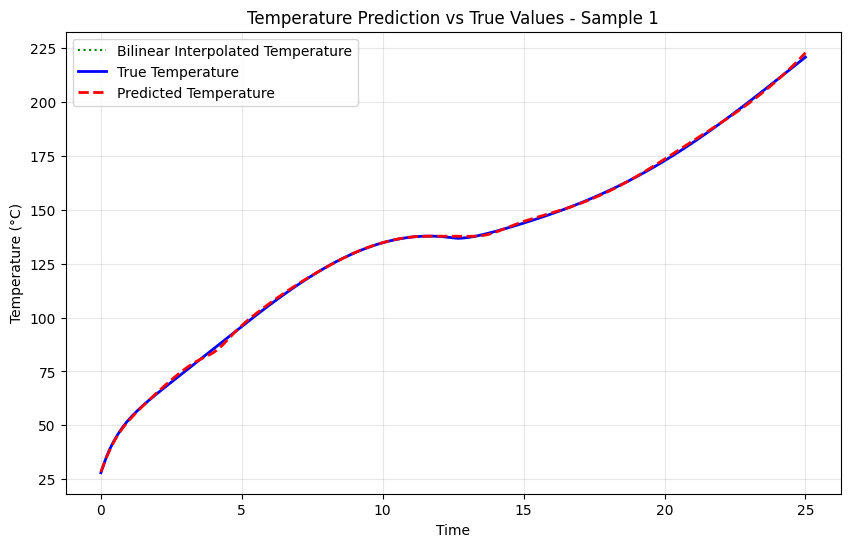

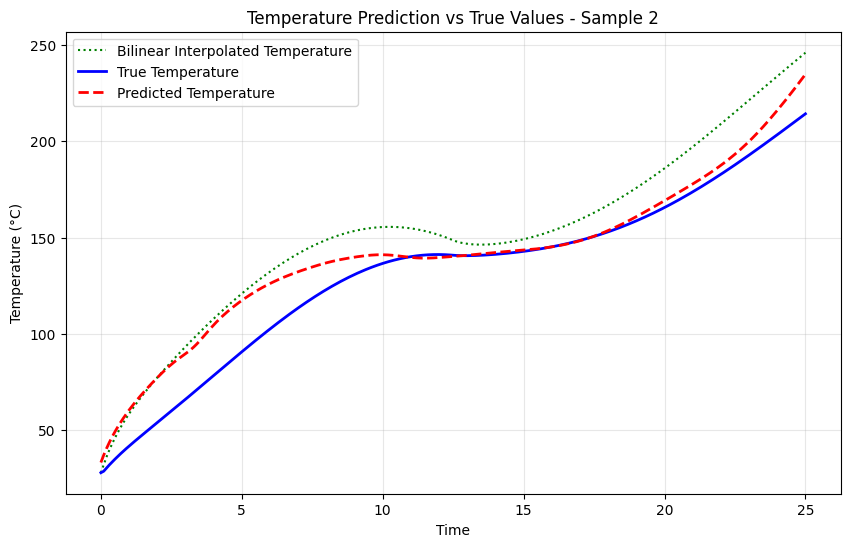

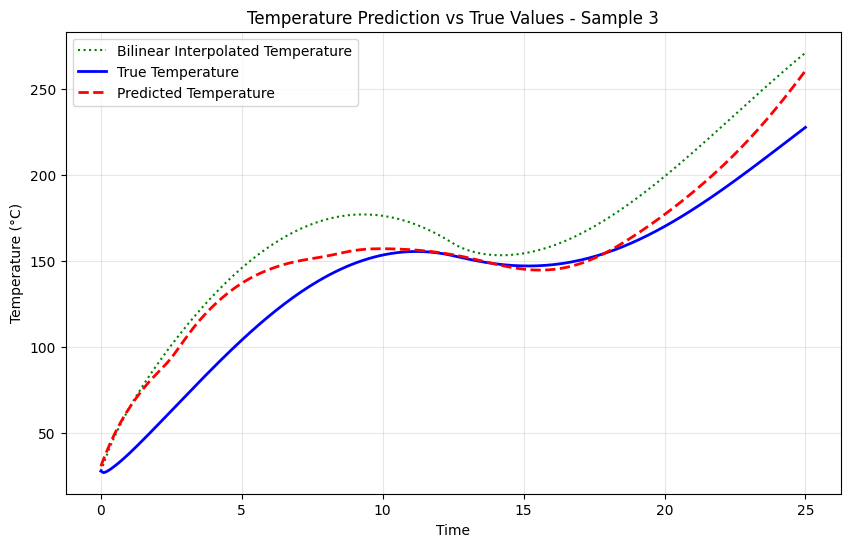

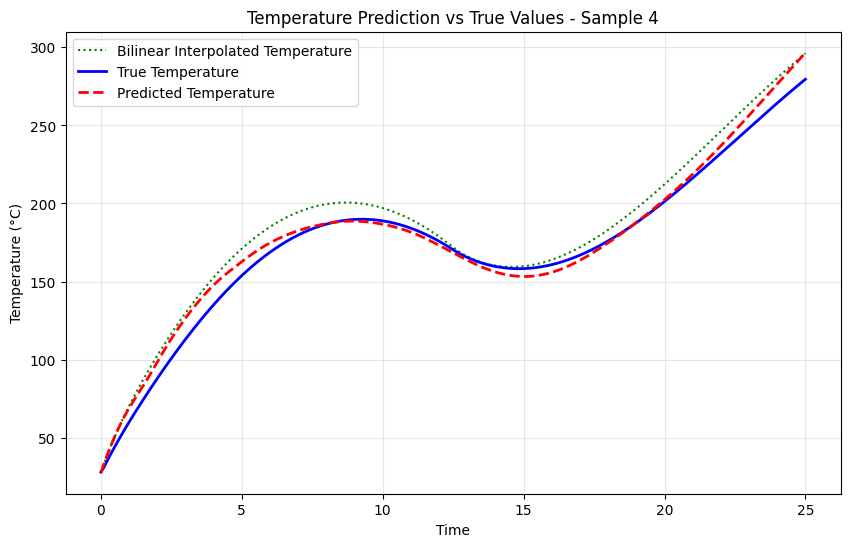

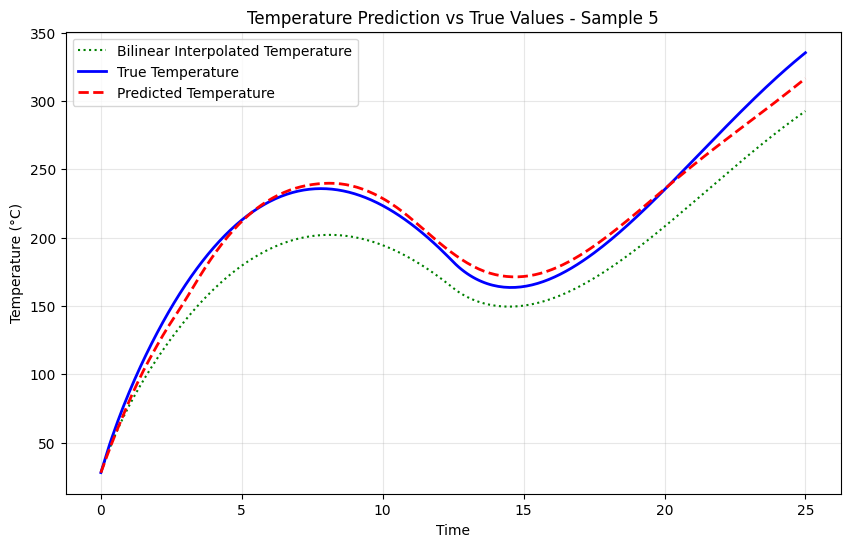

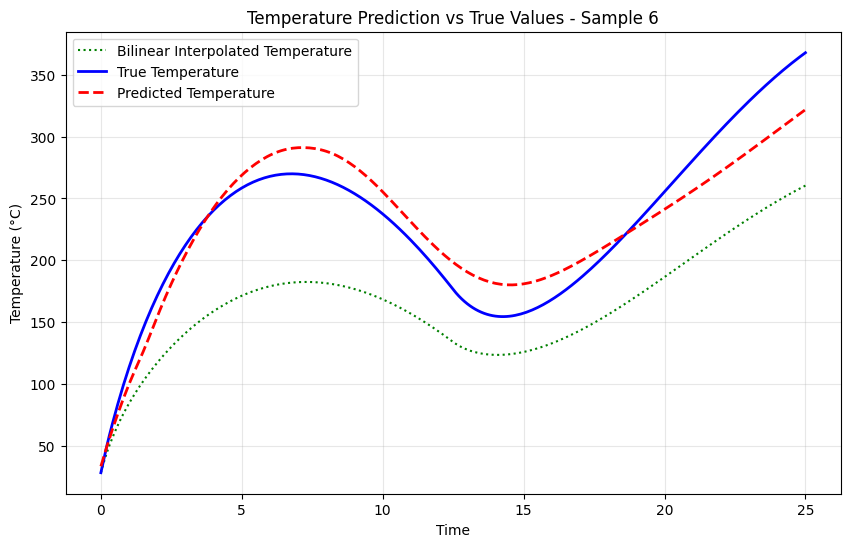

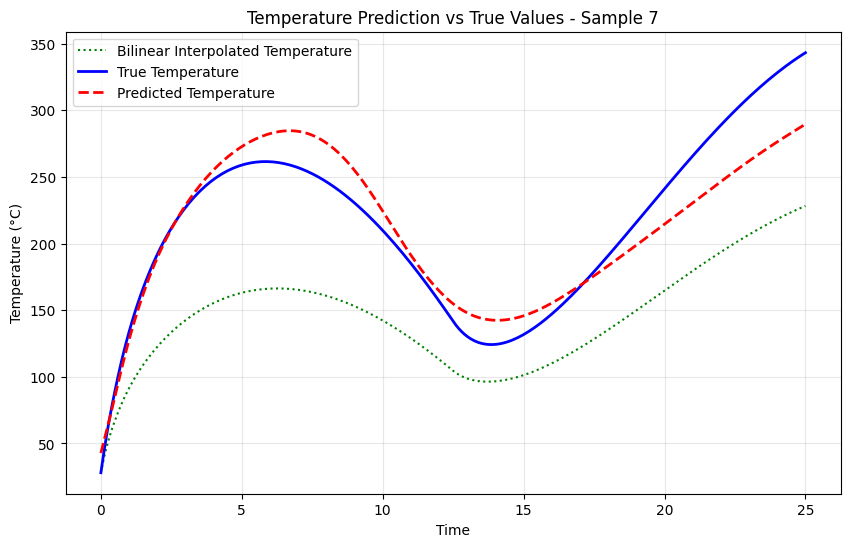

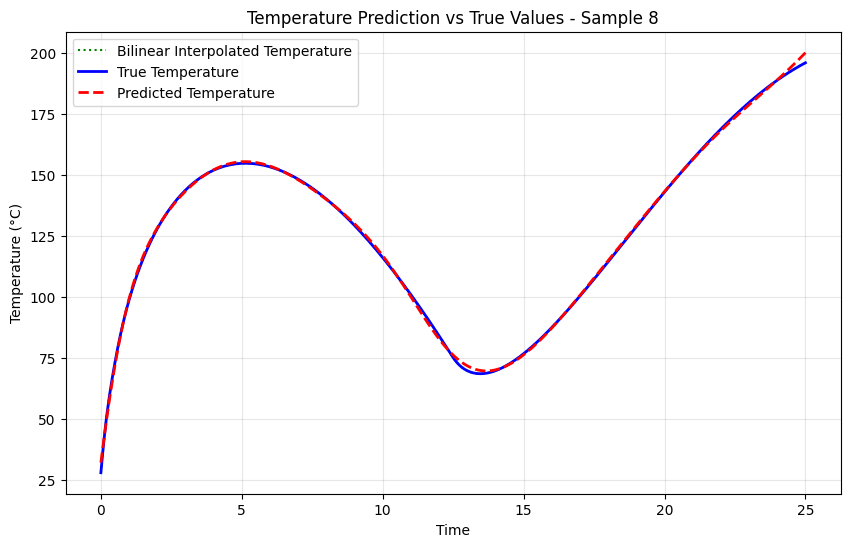

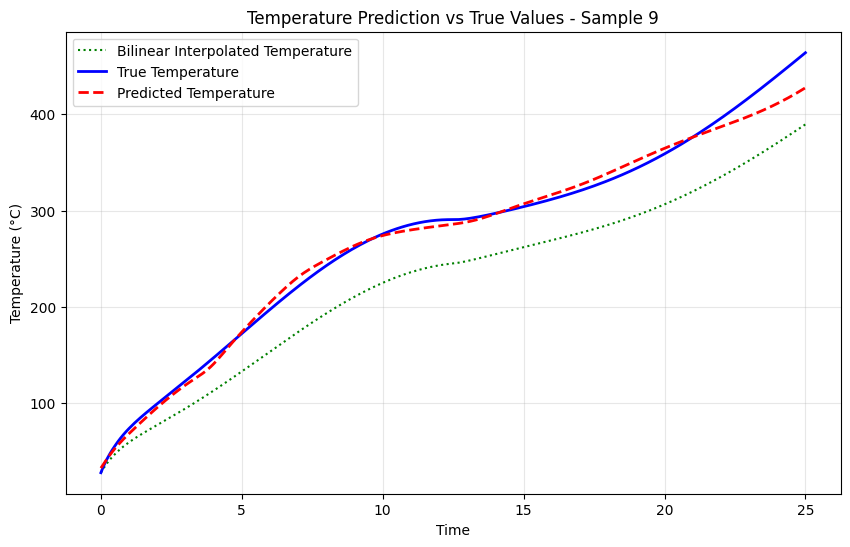

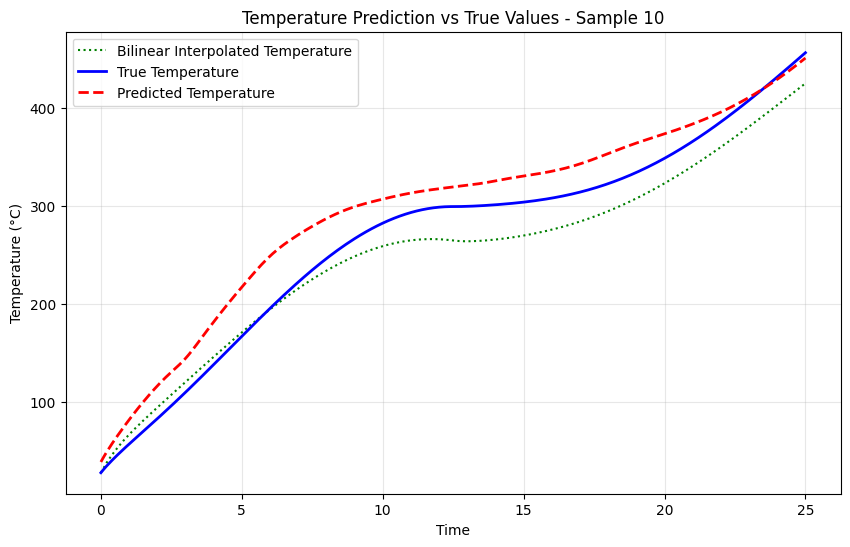

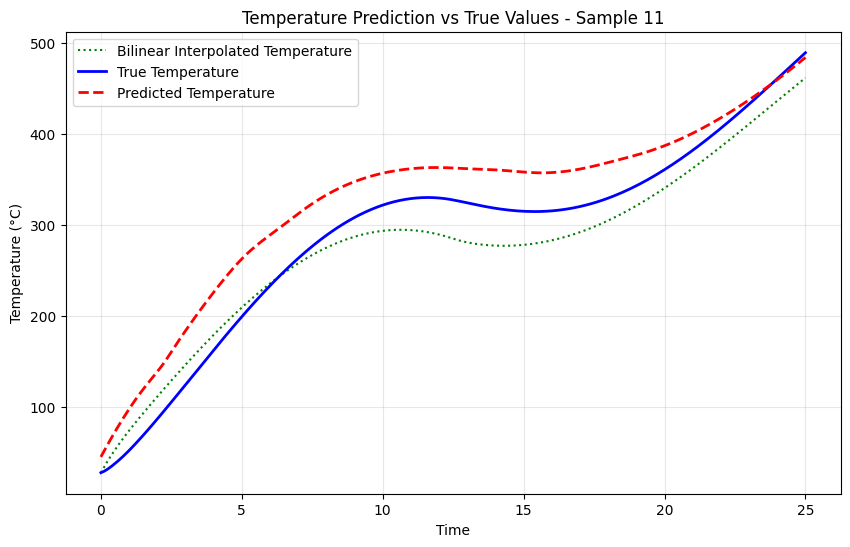

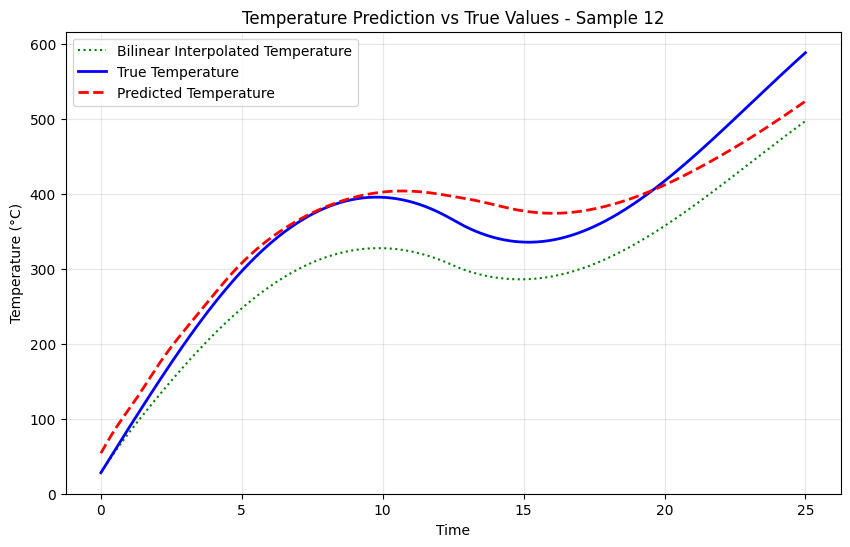

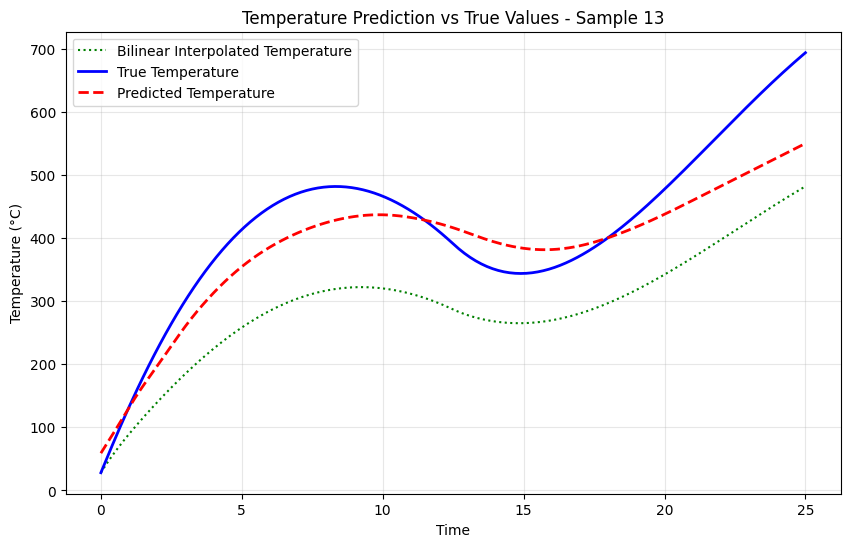

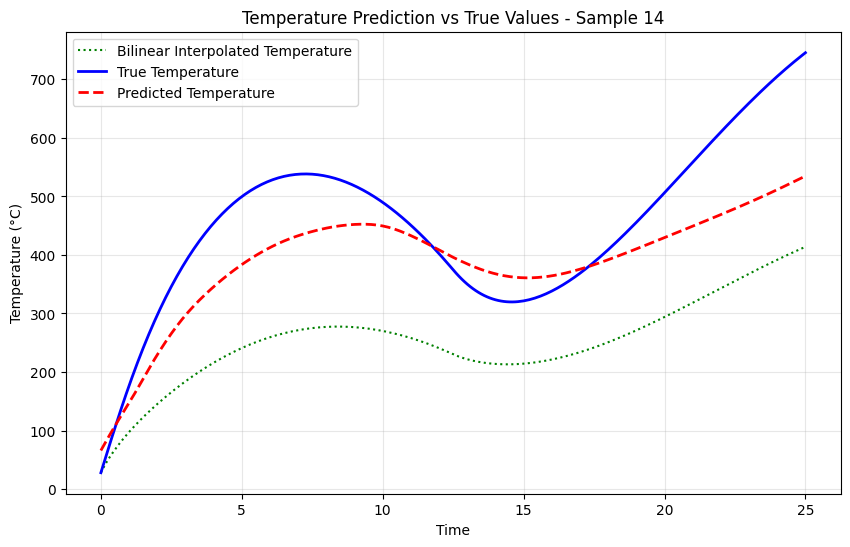

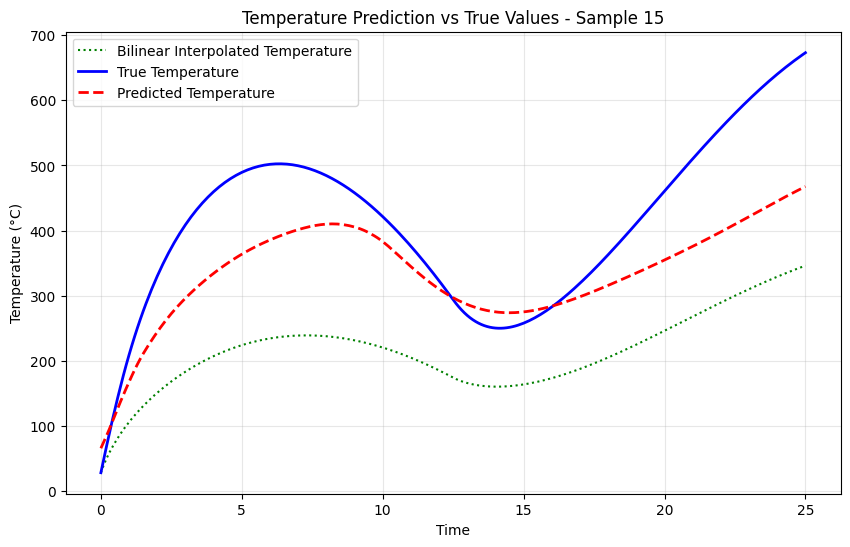

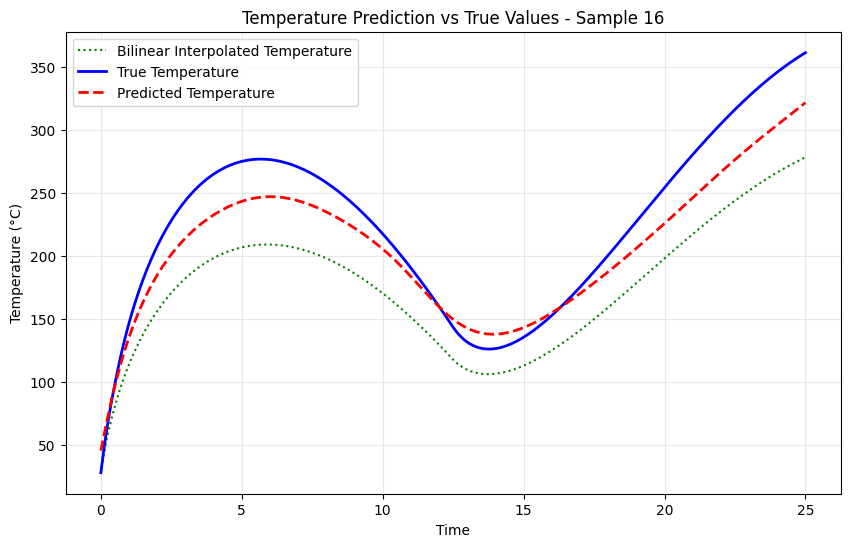

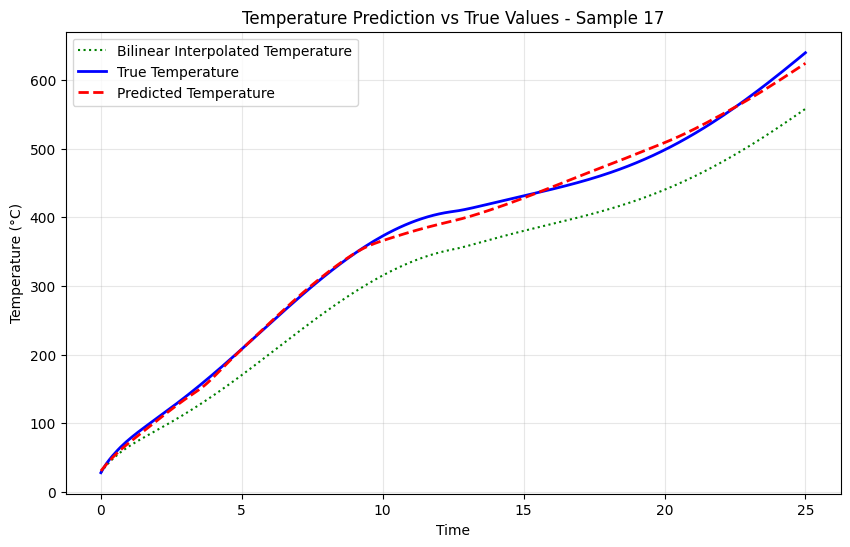

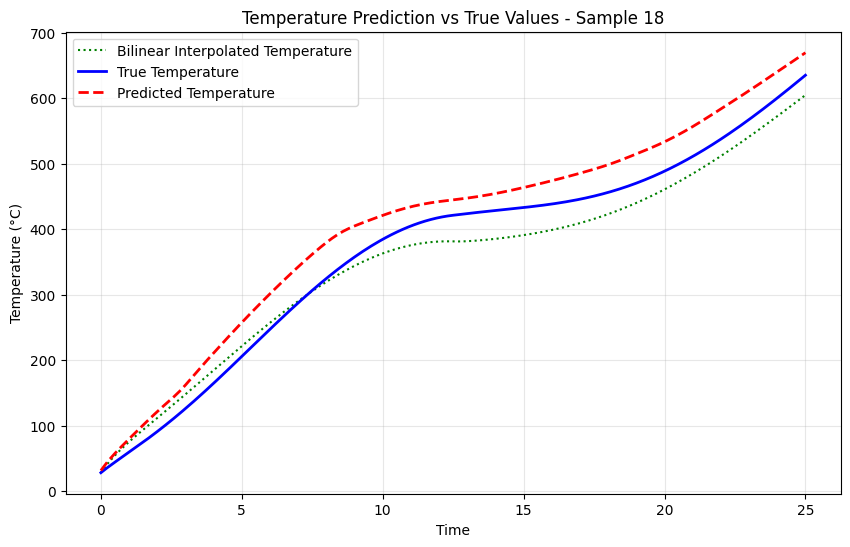

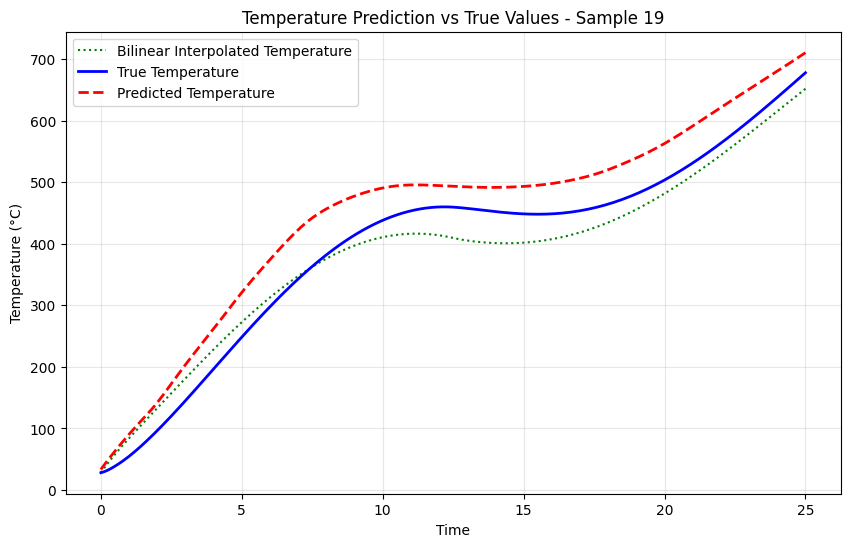

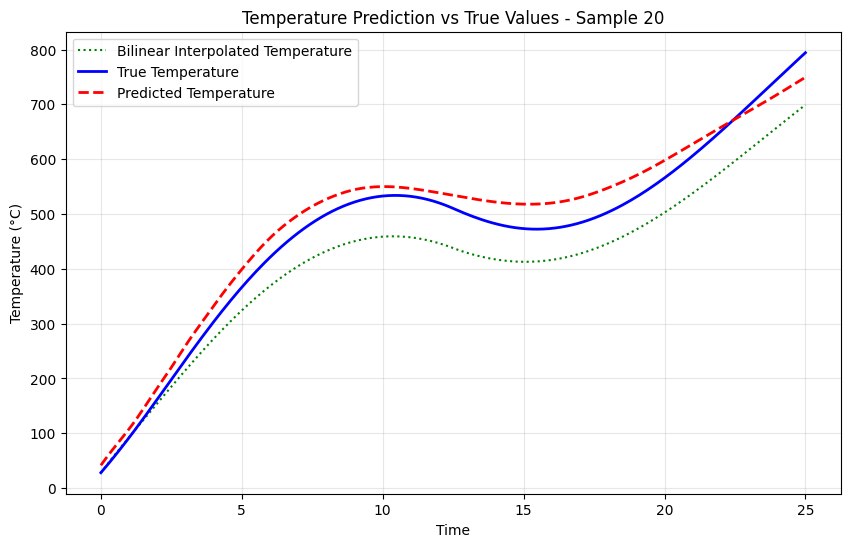

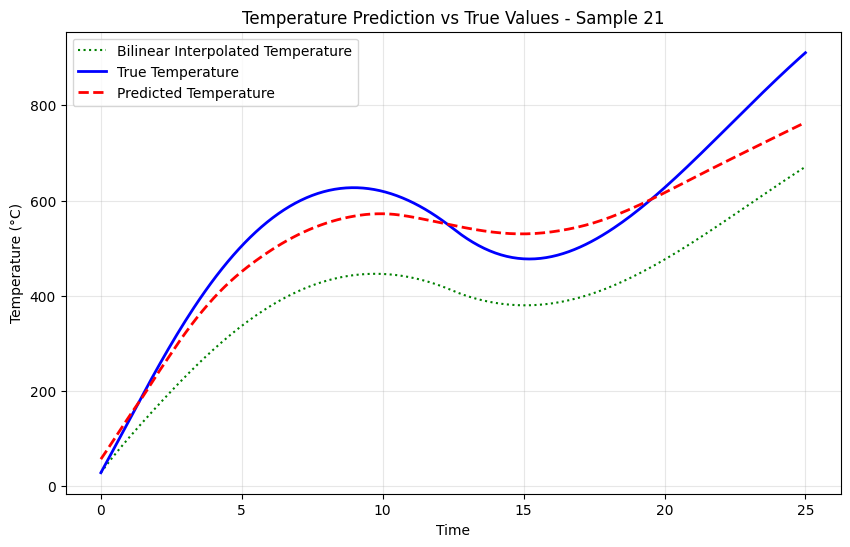

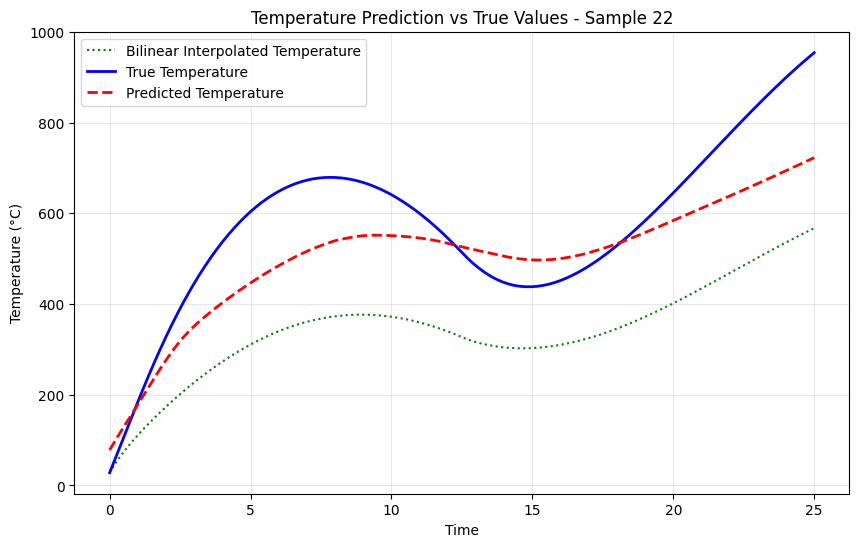

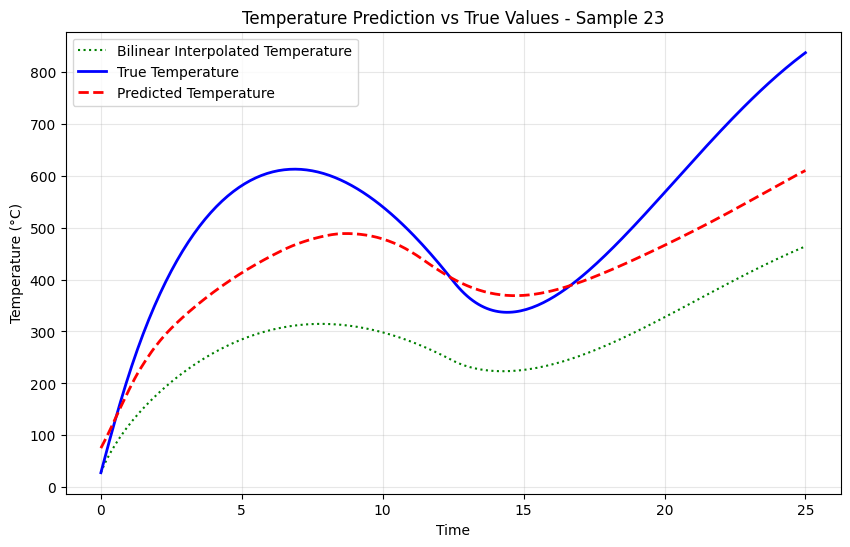

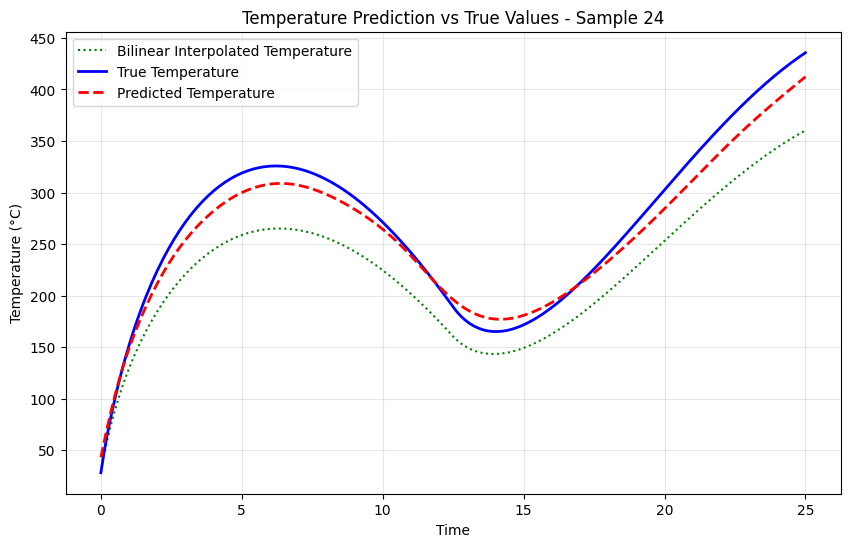

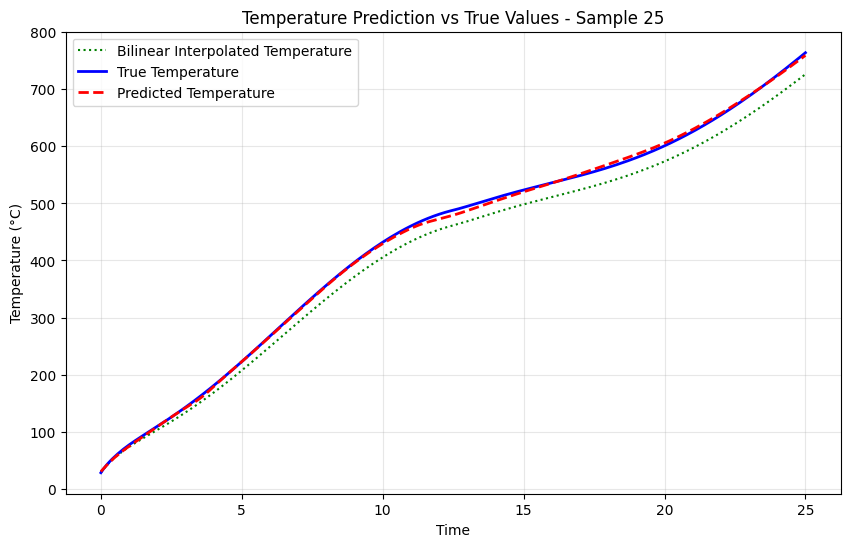

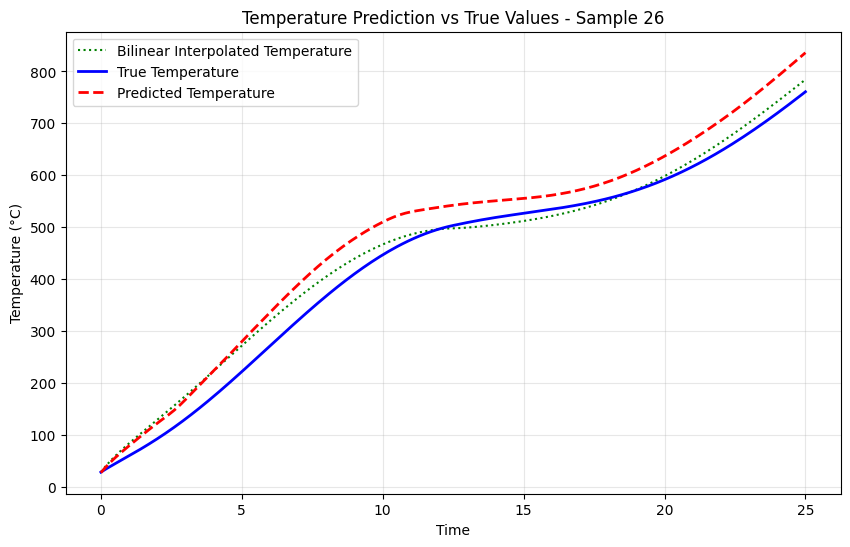

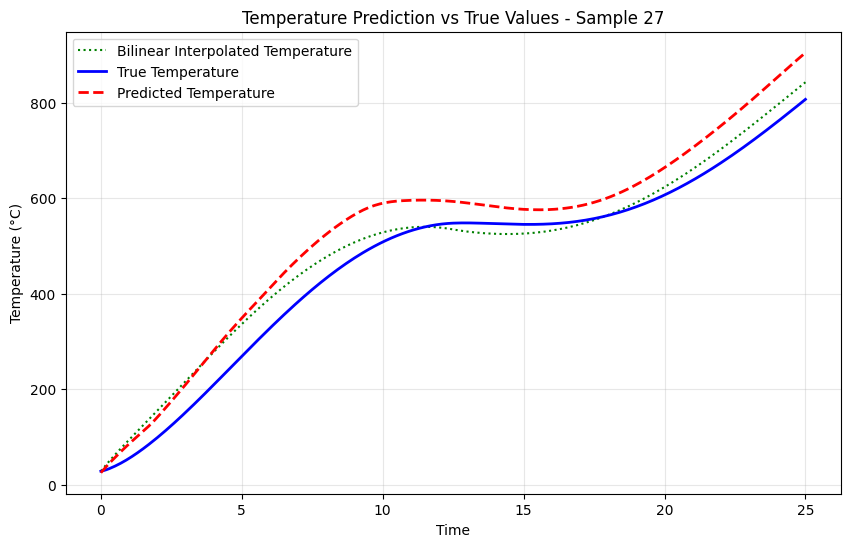

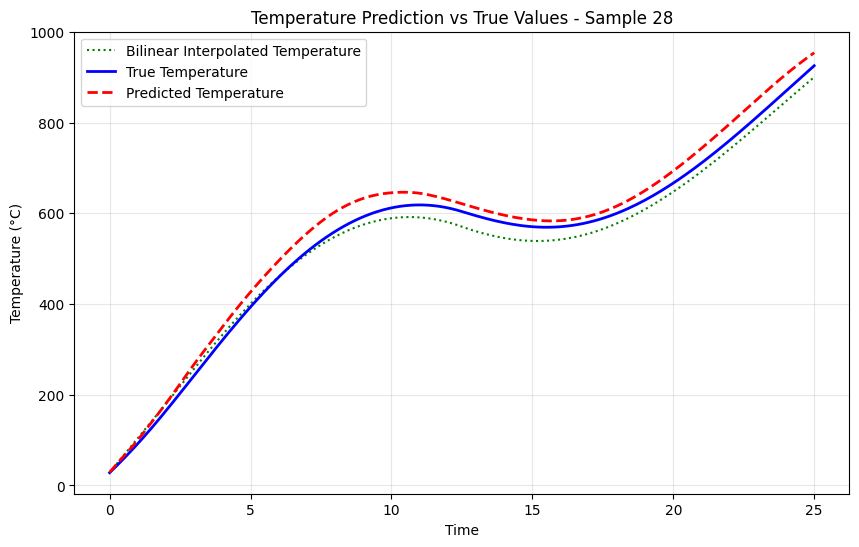

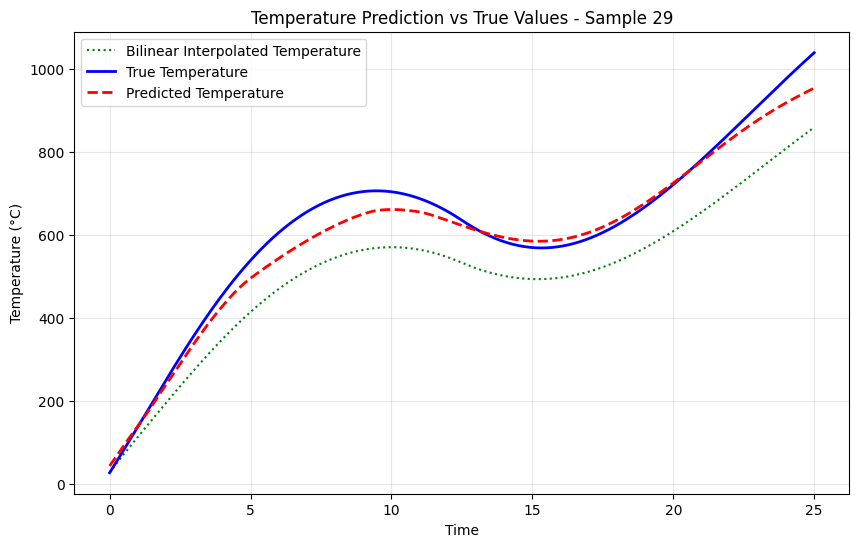

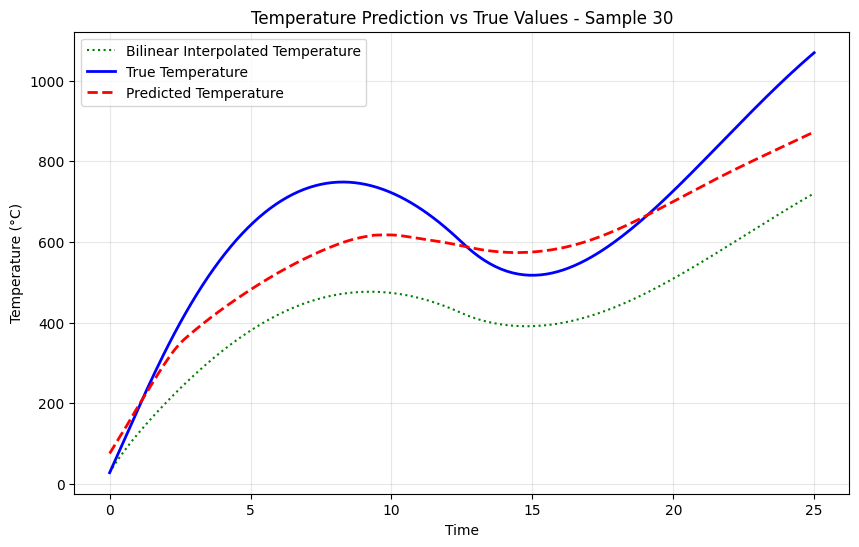

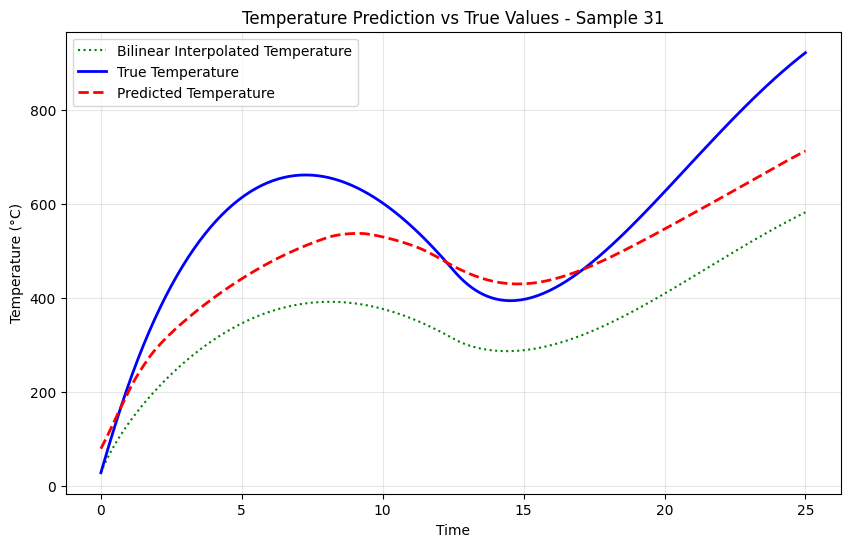

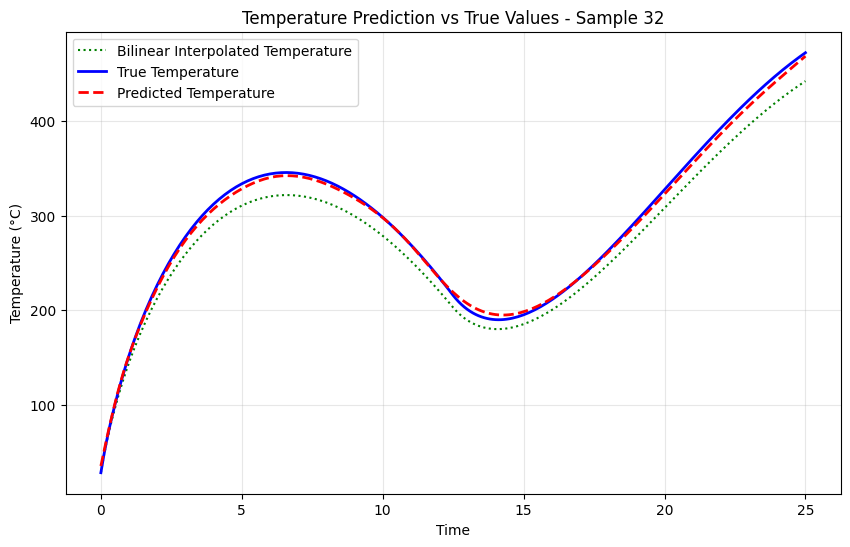

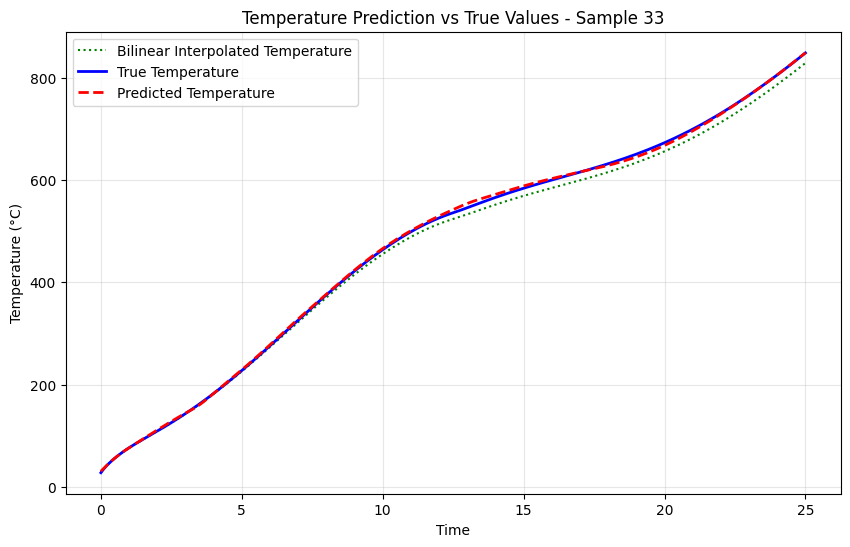

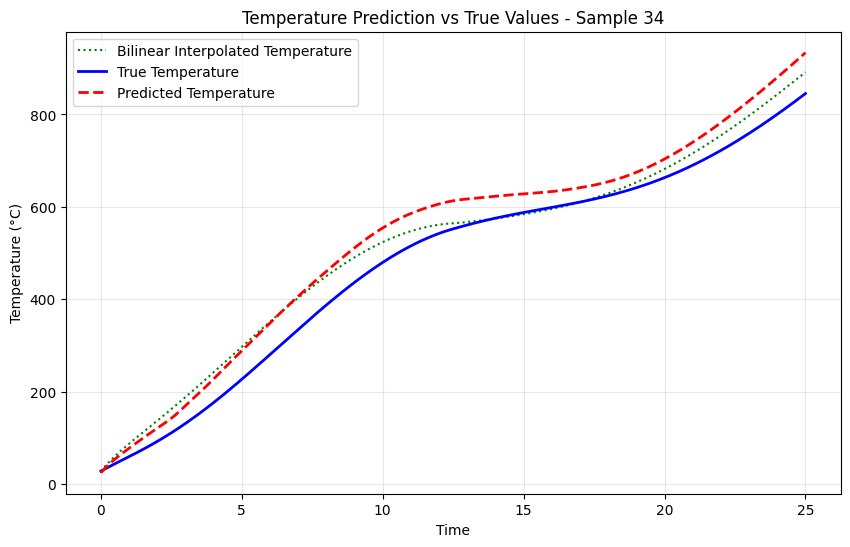

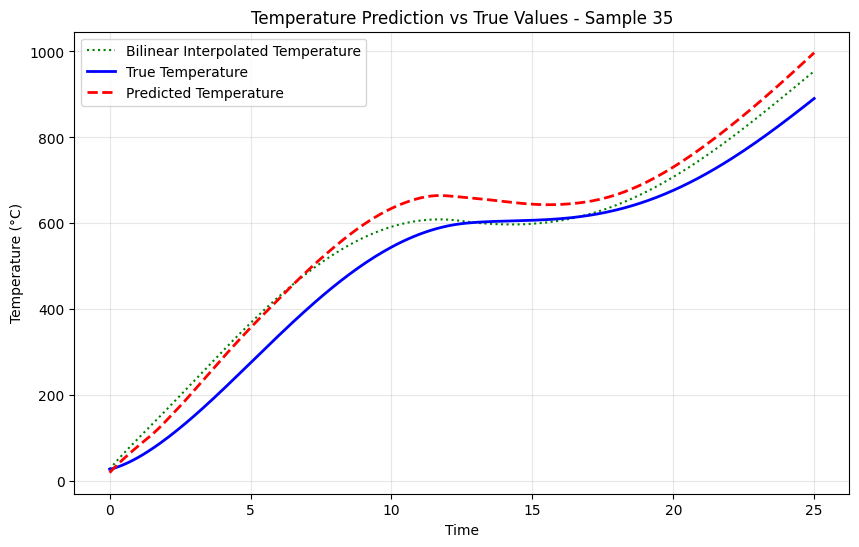

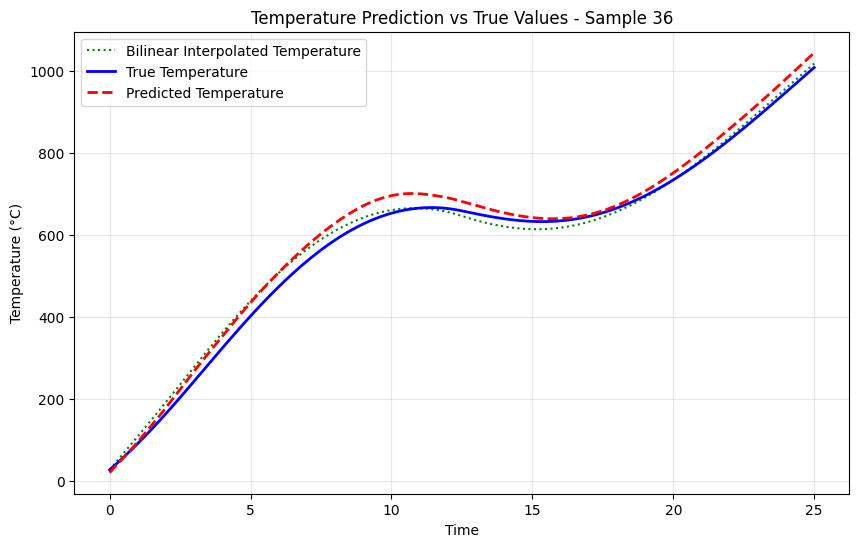

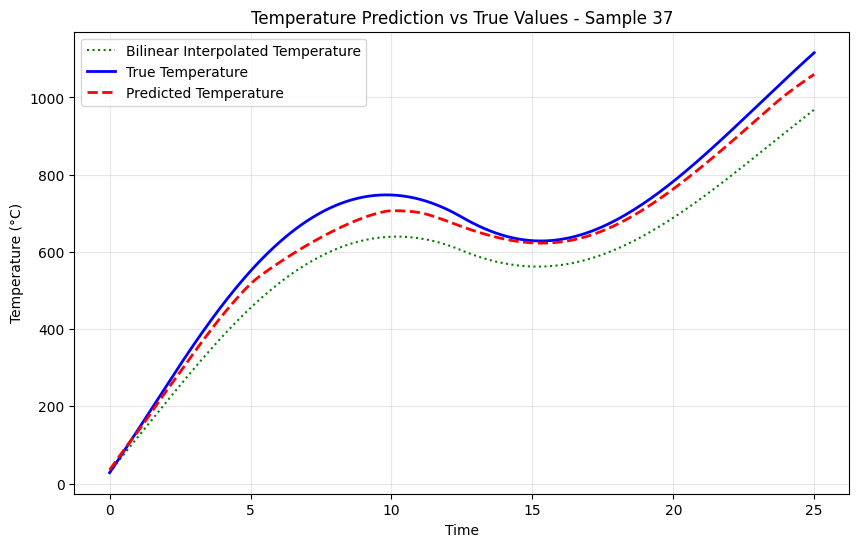

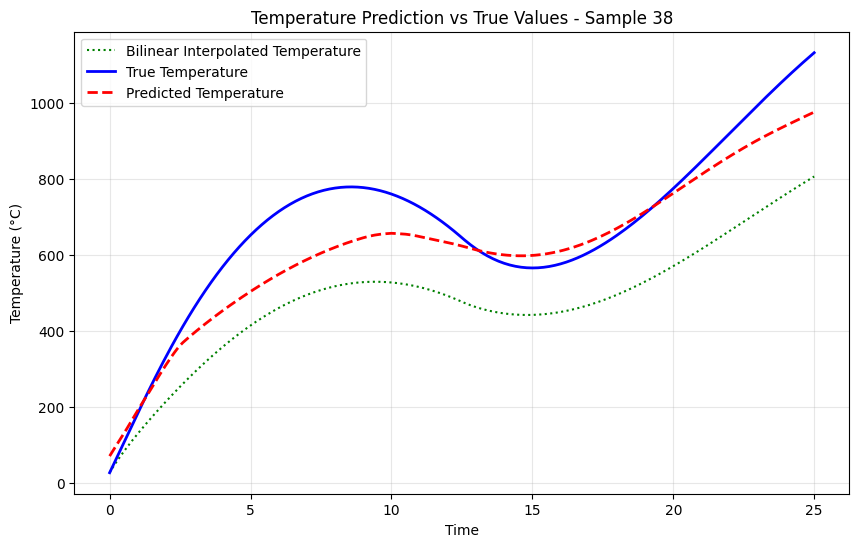

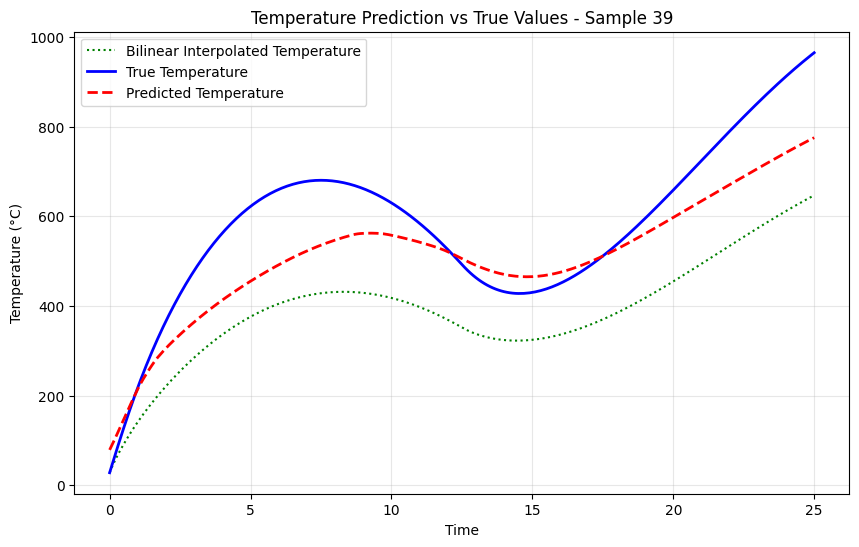

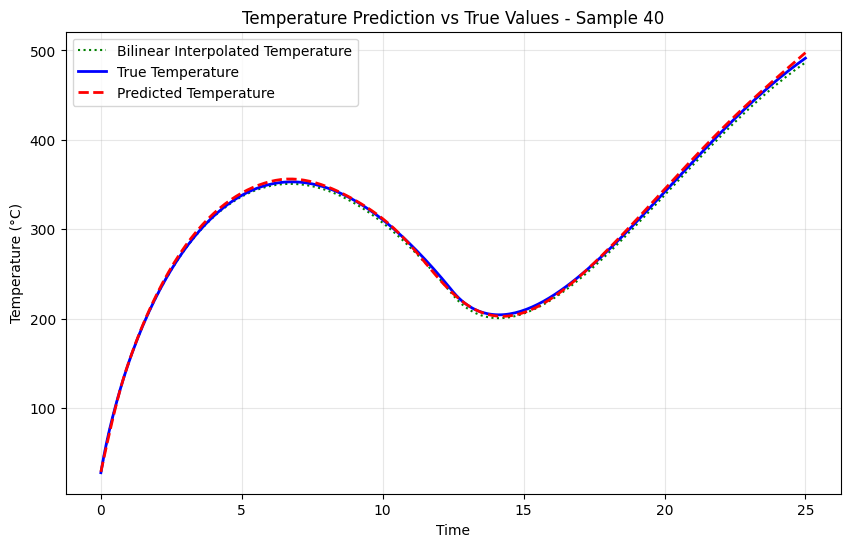

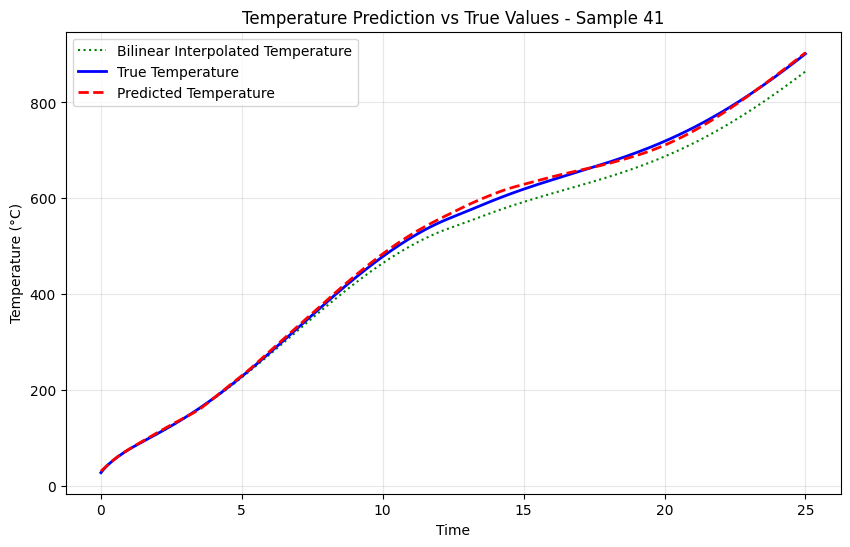

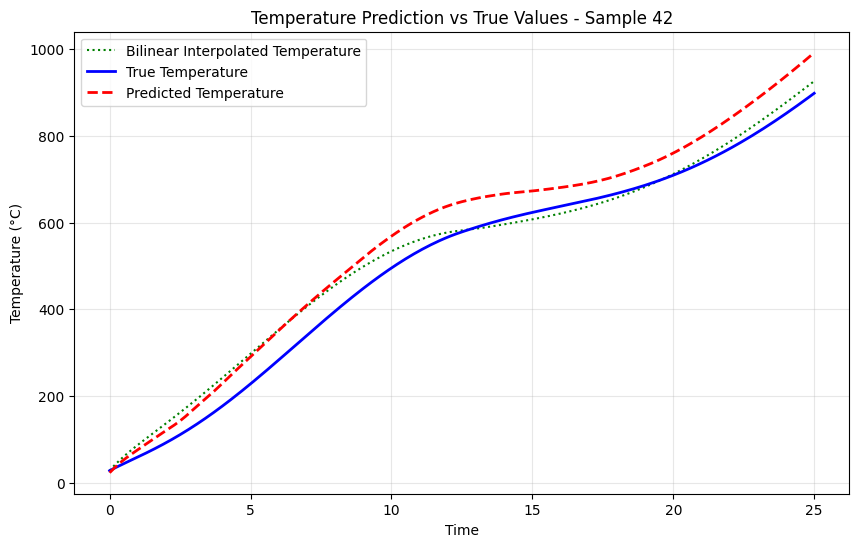

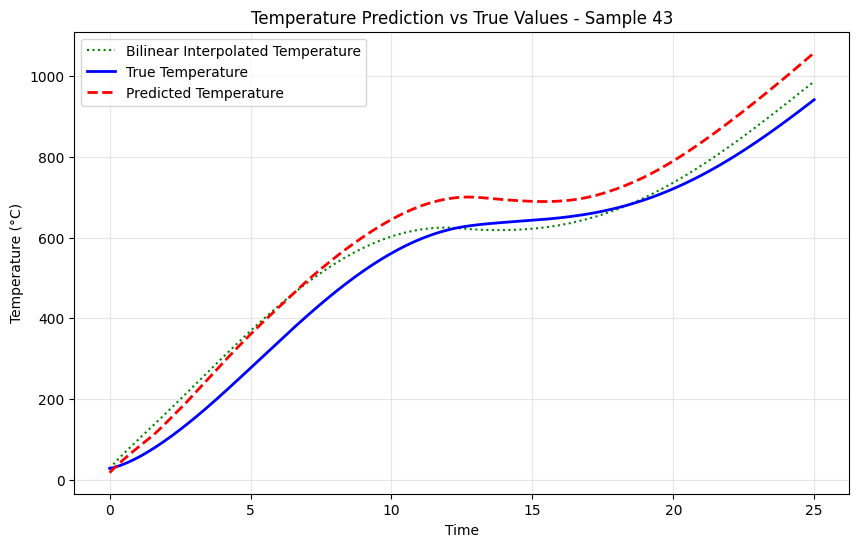

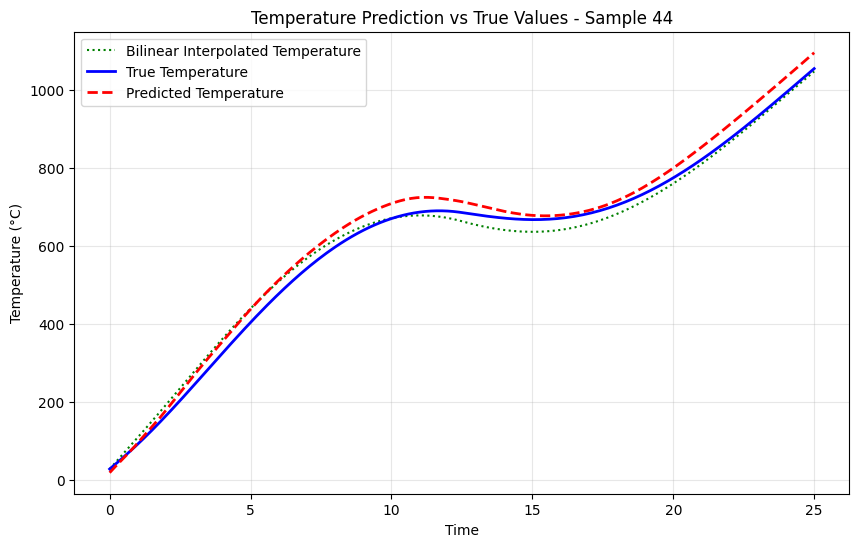

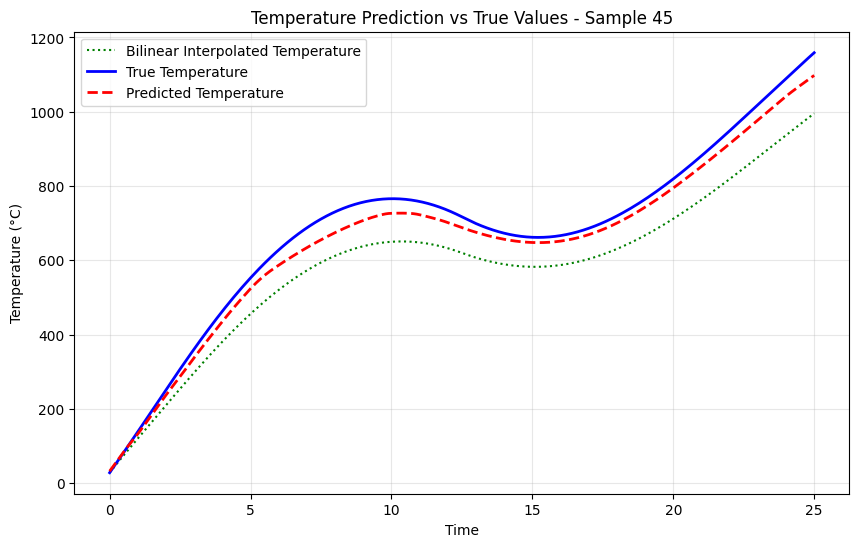

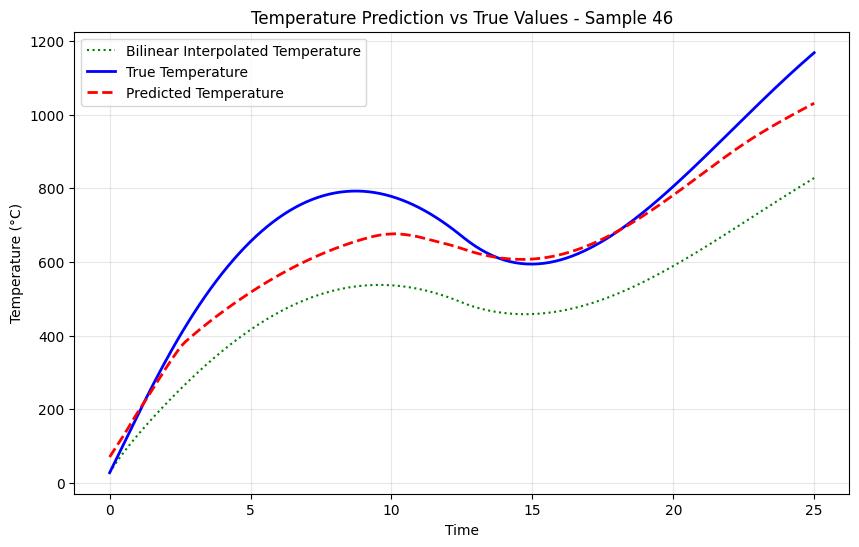

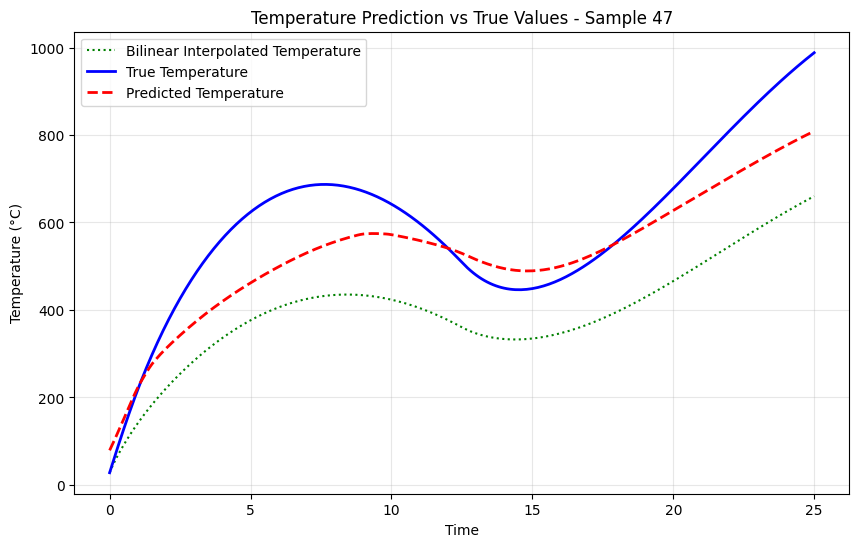

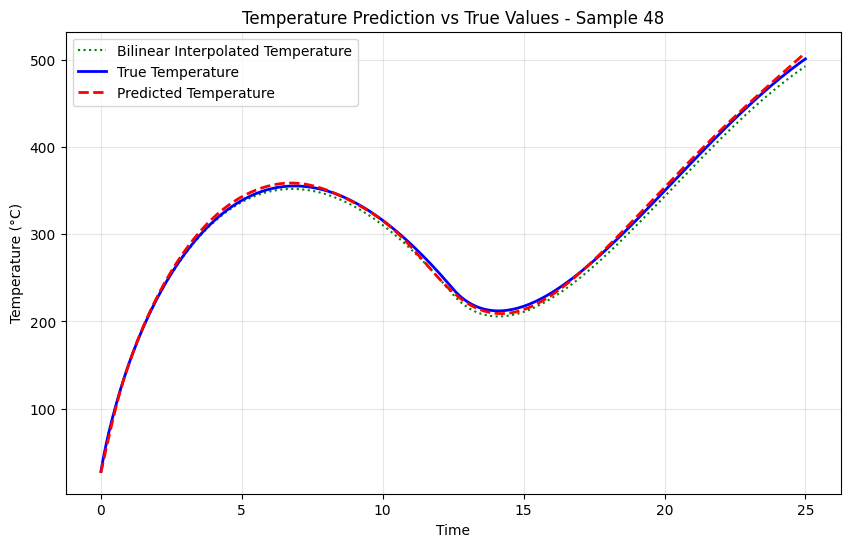

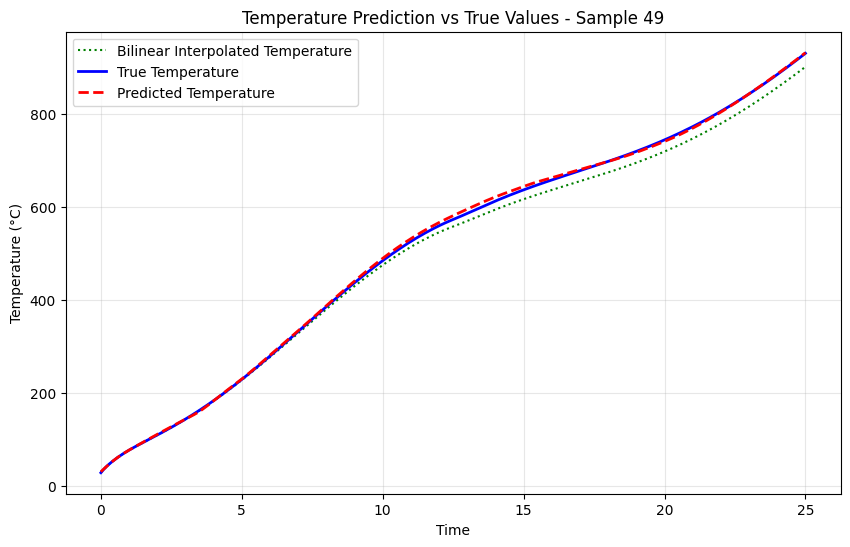

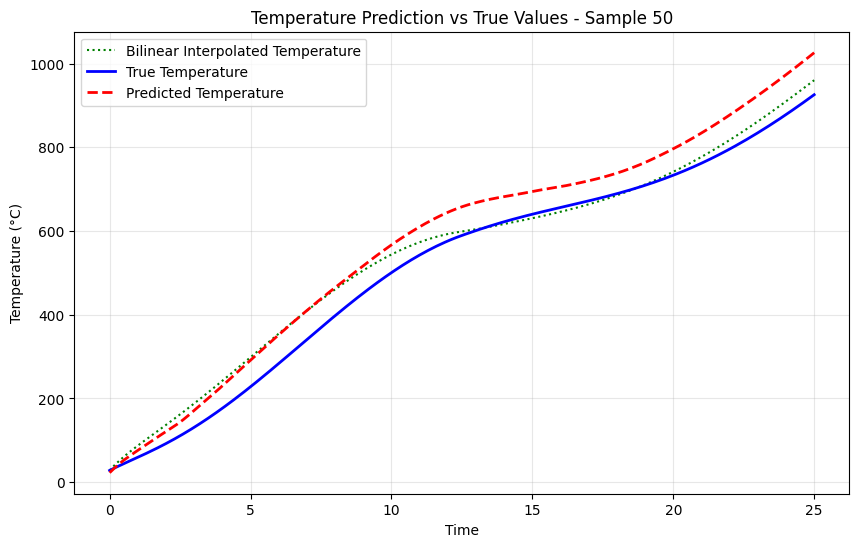

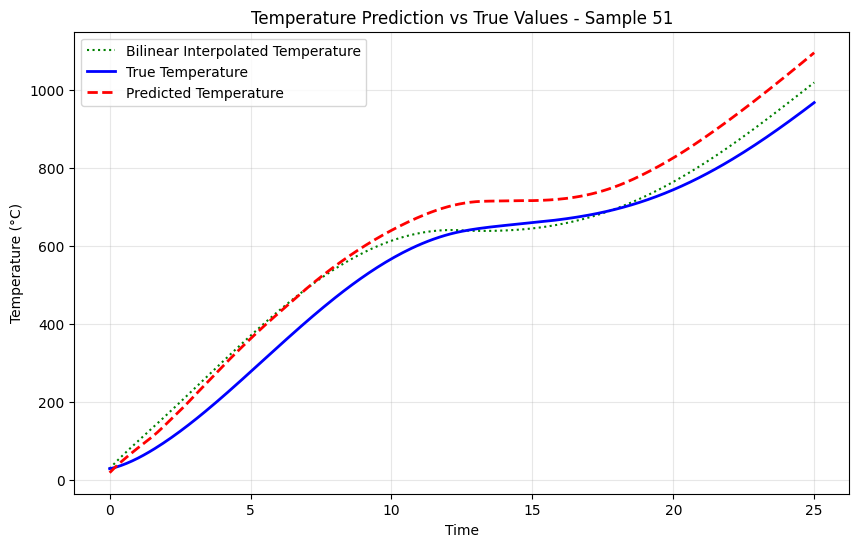

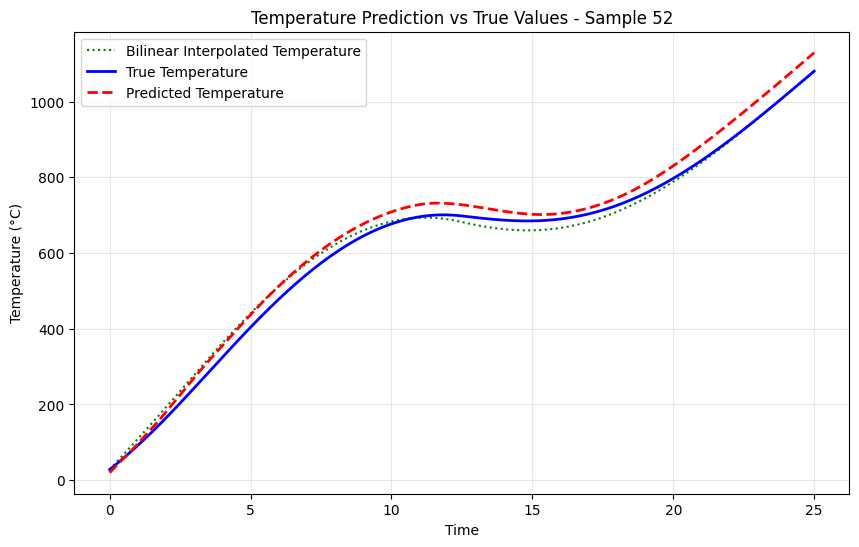

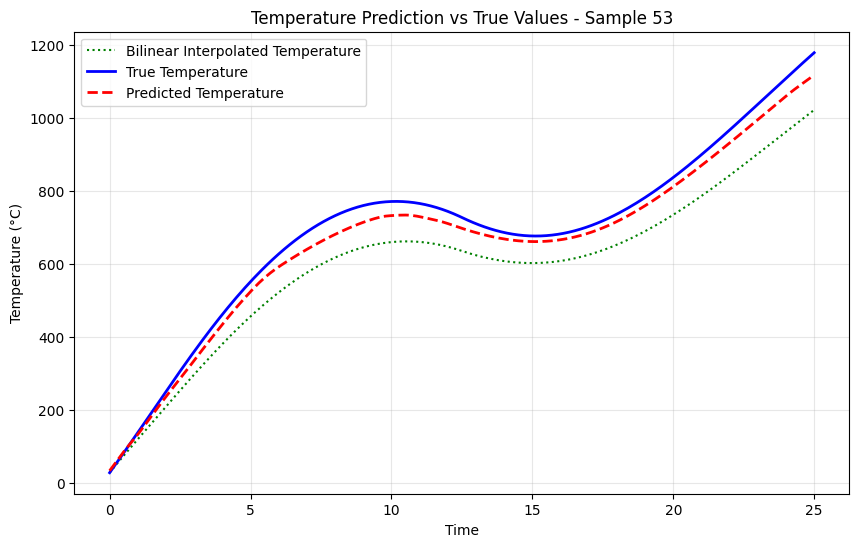

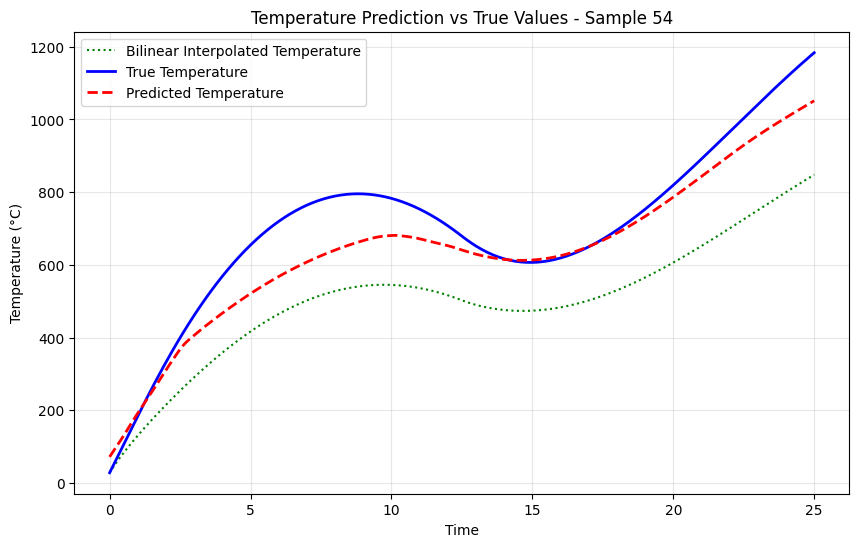

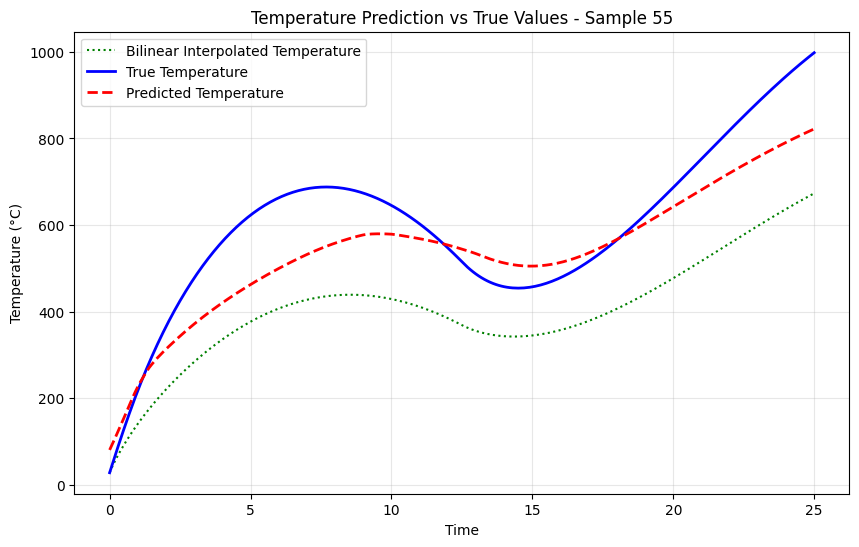

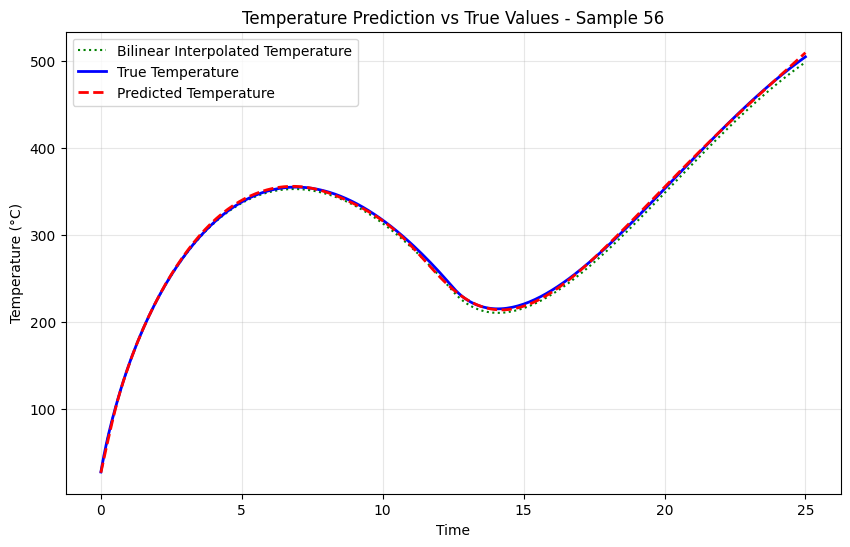

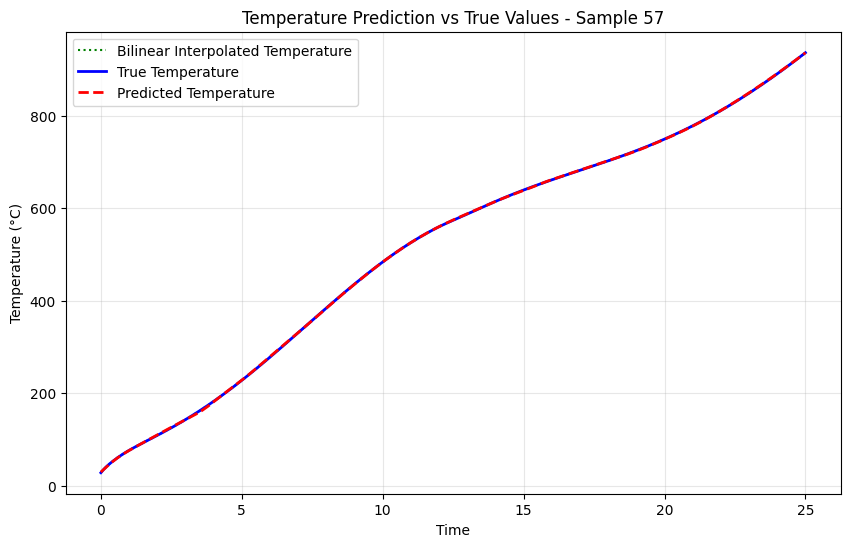

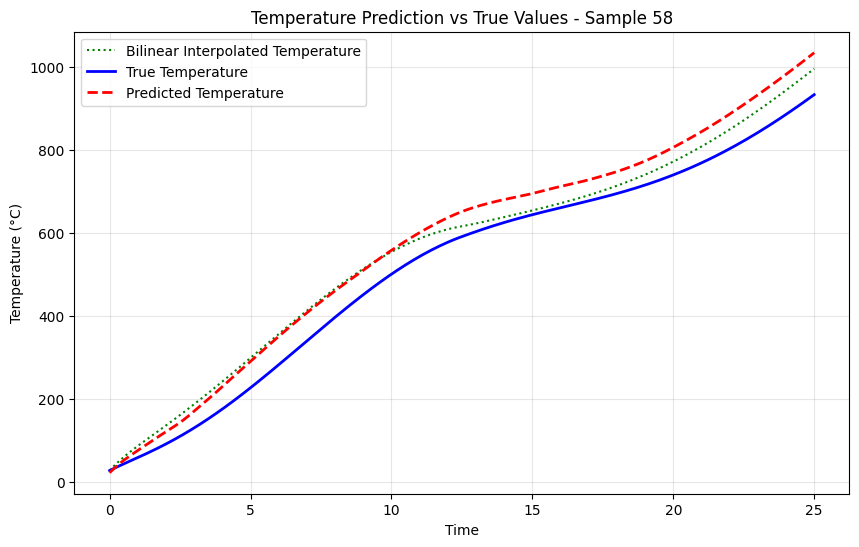

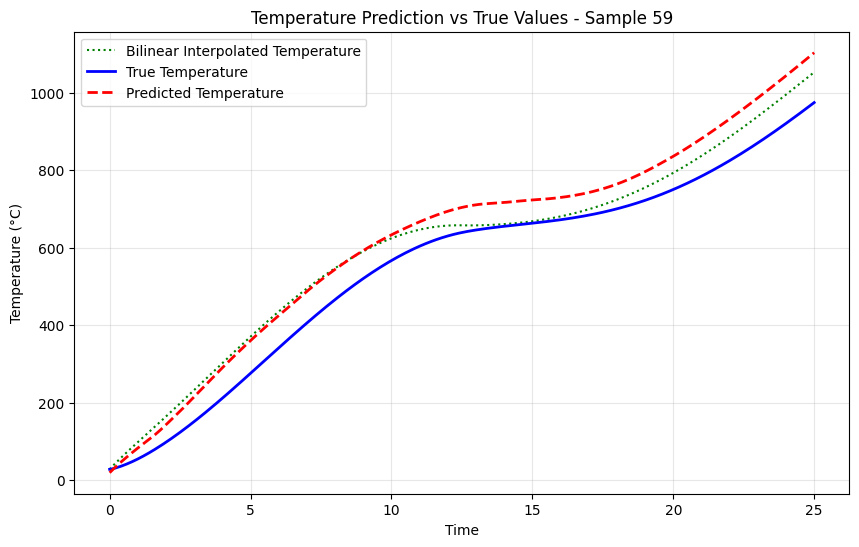

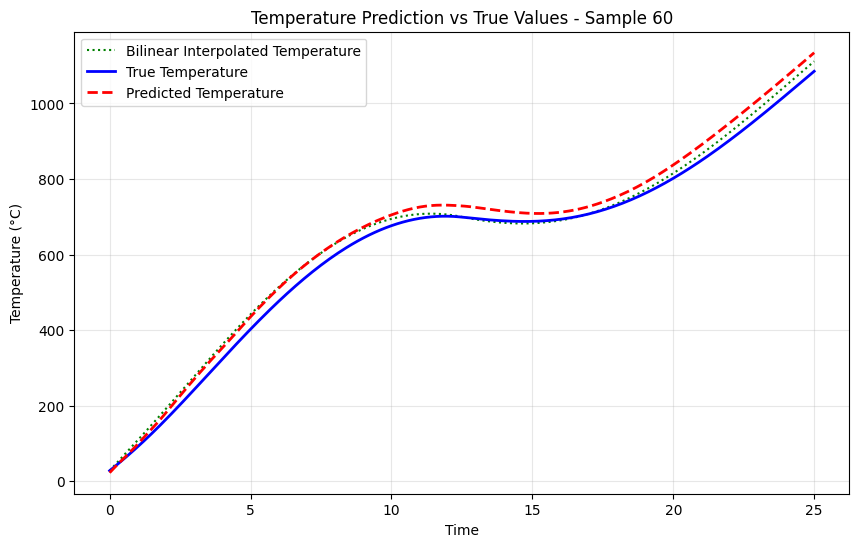

In [23]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

device = next(model.parameters()).device
print(f"Model is on device: {device}")

X_test = df_test_new.loc[:, ['r', 'z', 'time']].values  # Shape: (50, 3)
y_test = df_test_new['temperature'].values  # Shape: (50,)

X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

model.eval()  # Set to evaluation mode
with torch.no_grad():  # Disable gradient computation for faster inference
    y_pred = model(X_test).squeeze()

# Move results back to CPU for sklearn and matplotlib
y_pred_cpu = y_pred.cpu().numpy()
y_test_cpu = y_test.cpu().numpy()

# Calculate metrics
mse = mean_squared_error(y_test_cpu, y_pred_cpu)
print(f"Root Mean Squared Error NN: {mse**0.5:.4f}")

mse1 = mean_squared_error(df_test_new['bilinear_interpolated_temperature'], df_test_new['temperature'])
print(f"Root Mean Squared Error BL: {mse1**0.5:.4f}")
# Plotting - Make sure time_indices is defined
try:
    time_indices = df_test_new['time'].unique()  # Or however you define time_indices
except:
    # If time_indices not defined, create a simple range
    time_indices = range(251)  # Adjust based on your data structure

# Plot comparisons
for i in range(60):
    plt.figure(figsize=(10, 6))
    start_idx = i * 251
    end_idx = (i + 1) * 251
    plt.plot(df_test_new["time"][251*i:251*(i+1)],df_test_new['bilinear_interpolated_temperature'][251*i:251*(i+1)], label='Bilinear Interpolated Temperature', color='green', linestyle=":")
    plt.plot(time_indices, y_test_cpu[start_idx:end_idx],
             label='True Temperature', color='blue', linewidth=2)
    plt.plot(time_indices, y_pred_cpu[start_idx:end_idx],
             label='Predicted Temperature', color='red', linewidth=2, linestyle='--')

    plt.title(f'Temperature Prediction vs True Values - Sample {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


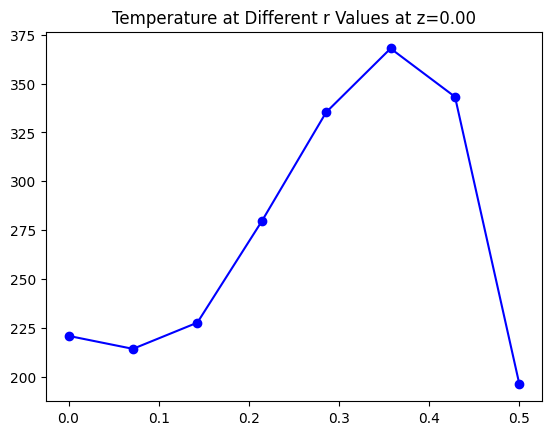

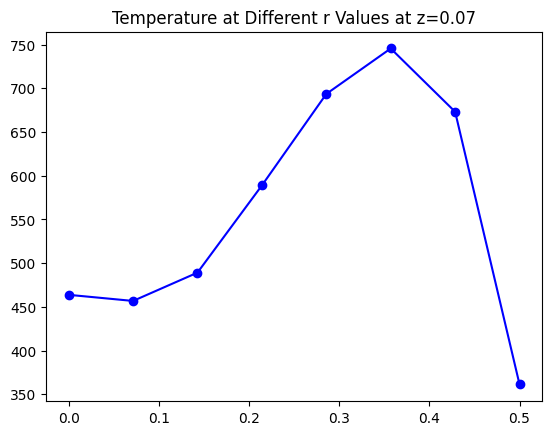

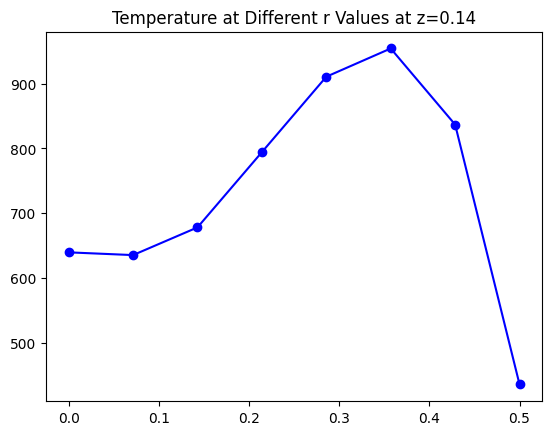

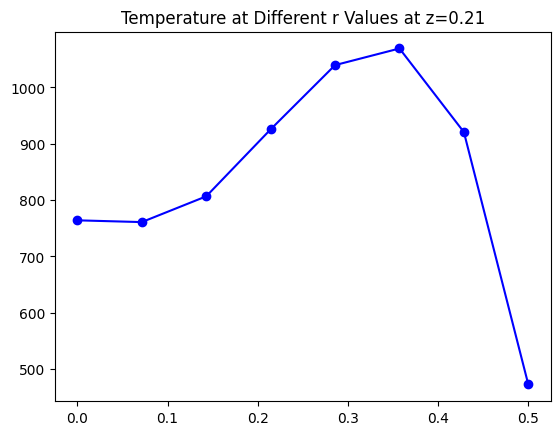

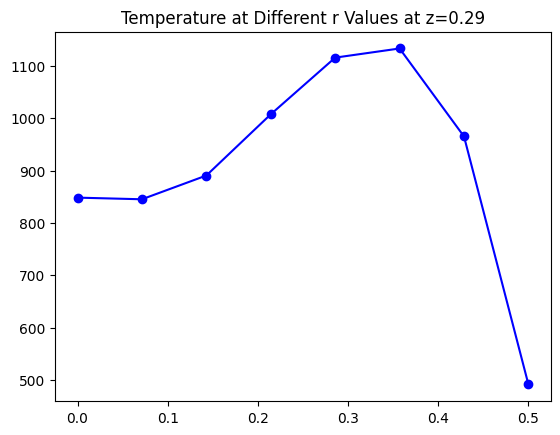

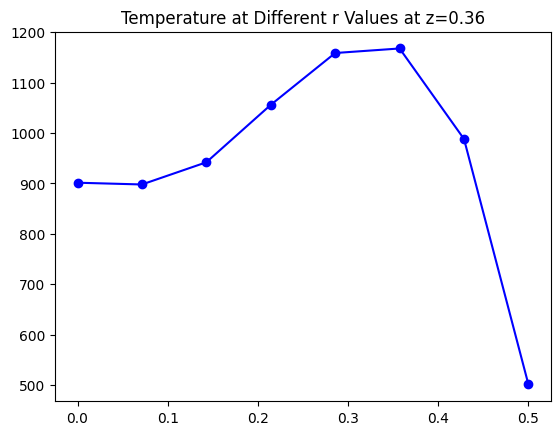

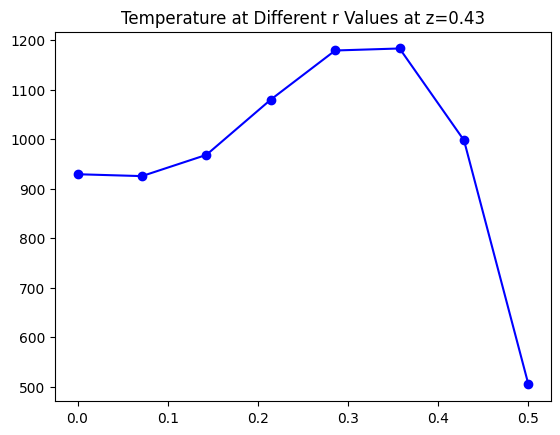

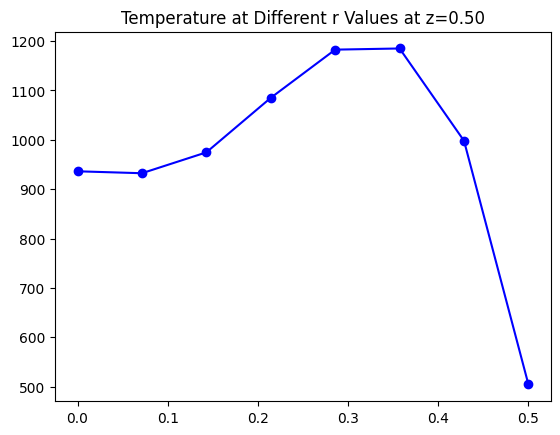

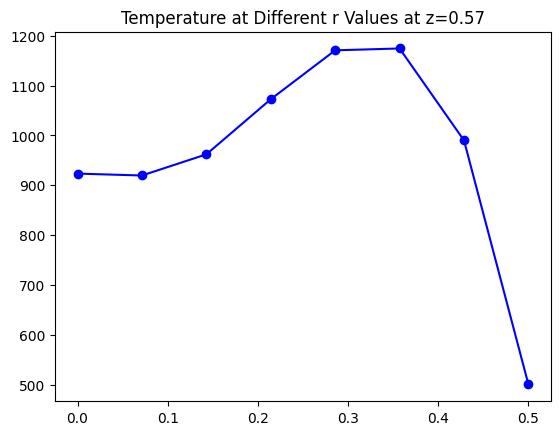

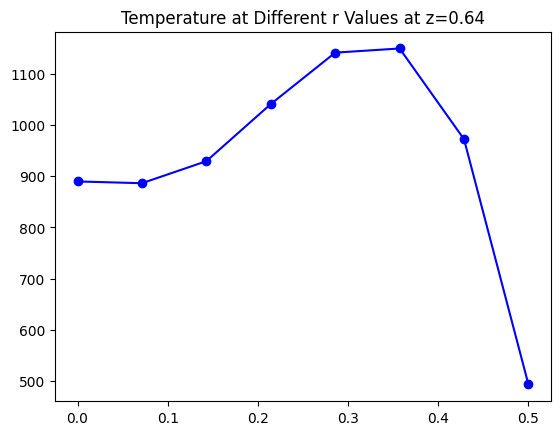

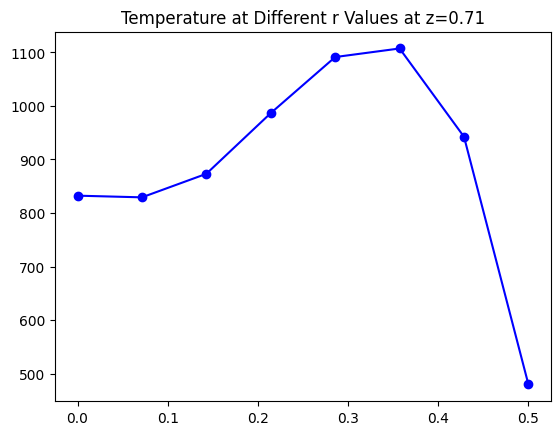

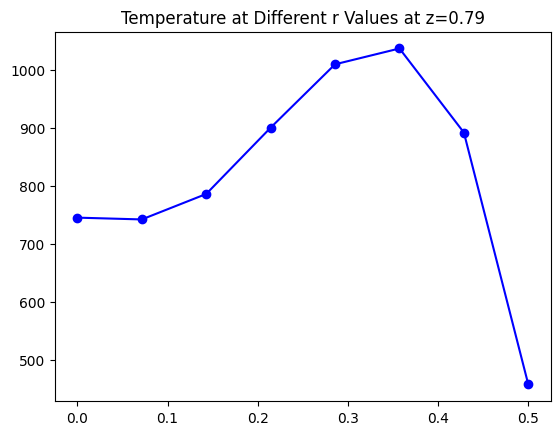

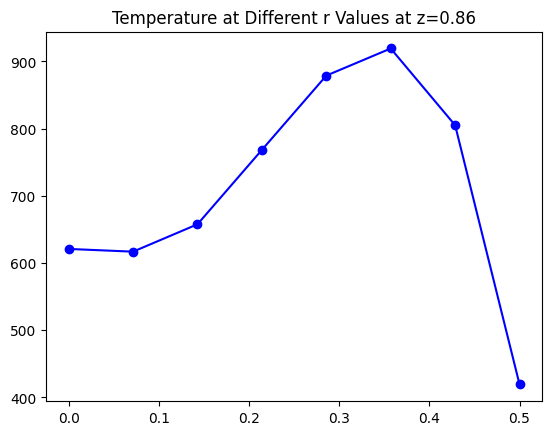

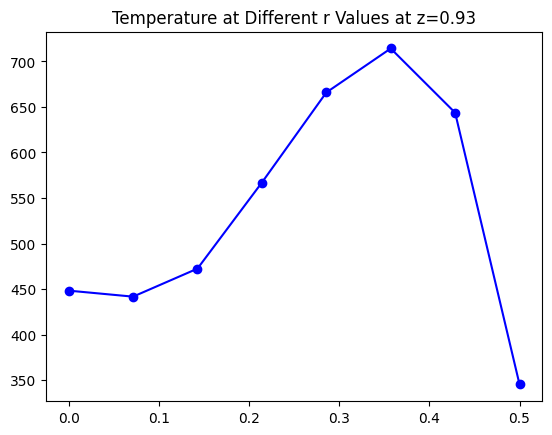

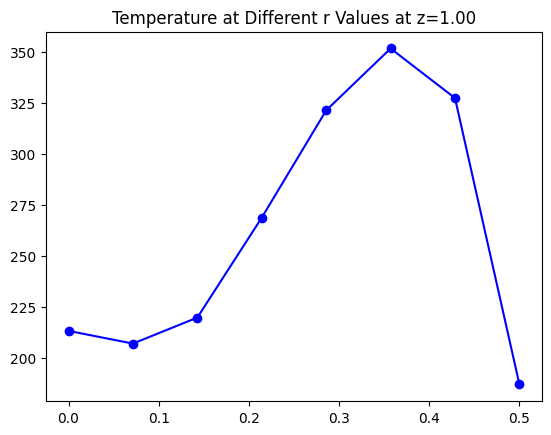

In [24]:
for j in range(15):
    vals = []
    for i in range(8):
        vals.append(df_test_new.iloc[i*251+j*251*8+250,[1,3]])

    dd = pd.DataFrame(vals, columns=['r', 'temperature'])

    plt.plot(dd['r'], dd['temperature'], marker='o', linestyle='-', color='blue')
    plt.title('Temperature at Different r Values at z={:.2f}'.format(df_test_new.iloc[j*251*8,2]))
    plt.show()

In [27]:
max(abs(y_pred_cpu - y_test_cpu)), min(abs(y_pred_cpu - y_test_cpu))

(np.float32(231.43817), np.float32(0.0002746582))